# Lending Case Study

## Business Understanding
You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

If the company approves the loan, there are 3 possible scenarios described below:

- __Fully paid:__ Applicant has fully paid the loan (the principal and the interest rate)
- __Current:__ Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
- __Charged-off__: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 


The data given below contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.Company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

## Objective:
Use EDA to understand how **_"consumer & loan attributes"_** influence the tendency of default.

---

In [1]:
# Importing the requisite libraries
import numpy as np
import pandas as pd

from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## 1) Data processing & Univariate Analysis: 
### Steps required to be followed:

1) Read CSV Data and check if all rows and columns have been imported
2) Check and remove any header/footer or total/subtotals in the data
3) As we're focusing only on default factors, we can remove data where loan_status is 'Current' as it has incomplete info
4) Drop columns where we have missing values in all the rows to reduce clutter
5) Check the number of unique values in all the fields. 
6) Drop columns which have the same value in all the rows as they do not give any additional information. 
7) Review remaining columns to see if they make business sense to keep them for analysis else drop them
8) Check if the data type of remaining columns is as per requirement. If not, then update the data type
9) Now check for missing values and perform treatment as required
10) Perform Outlier Treatment for Float & Integer Columns
11) Check to see if it makes sense to convert any numeric column into Categorical columns by binning/grouping
12) Classify the columns as categorical, numerical or Others(fields which are verbose or don't need to be analyzed)
13) Run count plots for categorical columns

### 1.1) Data Loading

In [2]:
# Read the CSV file into a pandas DataFrame
df = pd.read_csv('D:/UpGrad/IIITB_ML_AI_Jan24/Case Studies/Lending Case Study/Input/loan.csv')
print(df.shape)

(39717, 111)


### 1.2) Check and remove any header/footer or total/subtotals in the data

In [3]:
# Display the first few rows of the Dataset
print(df.head()) # Output indicates that there are no header records that needs to be removed.

        id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
0  1077501    1296599       5000         5000           4975.0   36 months   
1  1077430    1314167       2500         2500           2500.0   60 months   
2  1077175    1313524       2400         2400           2400.0   36 months   
3  1076863    1277178      10000        10000          10000.0   36 months   
4  1075358    1311748       3000         3000           3000.0   60 months   

  int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%       162.87     B        B2  ...                NaN   
1   15.27%        59.83     C        C4  ...                NaN   
2   15.96%        84.33     C        C5  ...                NaN   
3   13.49%       339.31     C        C1  ...                NaN   
4   12.69%        67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN               

In [4]:
# Display the last few rows of the Dataset
print(df.tail()) # Output indicates that there are no footer/total/subtotal records that needs to be removed.

          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv        term  \
39712  92187      92174       2500         2500           1075.0   36 months   
39713  90665      90607       8500         8500            875.0   36 months   
39714  90395      90390       5000         5000           1325.0   36 months   
39715  90376      89243       5000         5000            650.0   36 months   
39716  87023      86999       7500         7500            800.0   36 months   

      int_rate  installment grade sub_grade  ... num_tl_90g_dpd_24m  \
39712    8.07%        78.42     A        A4  ...                NaN   
39713   10.28%       275.38     C        C1  ...                NaN   
39714    8.07%       156.84     A        A4  ...                NaN   
39715    7.43%       155.38     A        A2  ...                NaN   
39716   13.75%       255.43     E        E2  ...                NaN   

      num_tl_op_past_12m pct_tl_nvr_dlq  percent_bc_gt_75  \
39712                NaN       

### 1.3 Remove records where loan_status is 'Current'.

In [5]:
freq=df['loan_status'].value_counts(dropna=False)
pct=(round(df['loan_status'].value_counts(dropna=False)/len(df)*100,2))
pd.DataFrame({'Freq':freq,'Pct':pct}) # There are 1140 rows equivalent to 2.87% of total records for value as 'Current'


,Freq,Pct
Fully Paid,32950,82.96
Charged Off,5627,14.17
Current,1140,2.87


In [6]:
df = df[df['loan_status'] != 'Current']
df.shape #1140 records dropped

(38577, 111)

### 1.4 Drop columns where we have missing values in all the rows to reduce clutter

In [7]:
# Drop columns with all values as missing (NaN)
df = df.dropna(axis=1, how='all')
print(df.shape) # Number of columns dropped from 111 to 56 (55 columns dropped as they contained only missing values)

(38577, 56)


### 1.5 Check the number of unique values in all the fields.

In [8]:
unique_val_cnt = df.nunique().sort_values(ascending=False)
print(unique_val_cnt)

id                            38577
member_id                     38577
url                           38577
total_pymnt                   36714
total_pymnt_inv               36387
last_pymnt_amnt               34418
total_rec_int                 34025
emp_title                     28027
desc                          25803
revol_bal                     21275
title                         19297
installment                   15022
funded_amnt_inv                8050
total_rec_prncp                6841
annual_inc                     5215
recoveries                     4040
dti                            2853
collection_recovery_fee        2616
total_rec_late_fee             1320
revol_util                     1088
funded_amnt                    1019
loan_amnt                       870
zip_code                        822
earliest_cr_line                524
int_rate                        370
mths_since_last_record          111
last_credit_pull_d              106
last_pymnt_d                

### 1.6 Drop columns which have the same value in all the rows as they do not give any additional information. 

In [9]:
single_value_columns = unique_val_cnt[unique_val_cnt==1].index.to_list() #There are 11 such columns
print(single_value_columns)

['pymnt_plan', 'out_prncp_inv', 'out_prncp', 'collections_12_mths_ex_med', 'policy_code', 'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt', 'initial_list_status', 'tax_liens']


In [10]:
# Drop the specified columns
df = df.drop(single_value_columns, axis=1)
print(df.shape) # Number of columns remaining = 45

(38577, 45)


### 1.7 Review remaining column names using data dictionary to see if they make business sense to keep them for analysis; else drop them

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 45 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  object 
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_title                36191 non-null  object 
 11  emp_length               37544 non-null  object 
 12  home_ownership           38577 non-null  object 
 13  annual_inc               38577 non-null  float64
 14  verification_status   

#### Columns that can be dropped:
__Post Loan Issued columns__ - As info for these columns are not available at time of loan issuance hence should not be considered for our analysis.

['collection_recovery_fee',
'delinq_2yrs',
'funded_amnt',
'funded_amnt_inv',
'inq_last_6mths',
'last_credit_pull_d',
'last_pymnt_amnt',
'last_pymnt_d',
'recoveries',
'total_pymnt',
'total_pymnt_inv',
'total_rec_int',
'total_rec_late_fee',
'total_rec_prncp',
'mths_since_last_delinq',
'mths_since_last_record']

__Text/Verbose columns__ - These columns contain high amount of text and not really useful for analysis. Any relevant info that could have been derived has already been extracted in other columns.

['emp_title',
'id',
'desc',
'title',
'member_id',
'url']

__zipcode column__ - While this column could have been useful, due to legal/compliance restrictions, this variable cannot be used as factor to determine default probability

['zip_code']

In [12]:
# Drop columns identified above
post_loan_issued_cols = ['collection_recovery_fee', 'delinq_2yrs', 'funded_amnt', 'funded_amnt_inv', 'inq_last_6mths', 'last_credit_pull_d', 'last_pymnt_amnt', 'last_pymnt_d', 'recoveries', 'total_pymnt', 'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp', 'mths_since_last_delinq', 'mths_since_last_record']
txt_verbose_cols = ['emp_title', 'id', 'desc', 'title', 'member_id', 'url']
zip_cols = ['zip_code']
cols_to_drop = post_loan_issued_cols + txt_verbose_cols + zip_cols

# Drop the specified columns
df = df.drop(cols_to_drop, axis=1)
print(df.shape) # Number of columns remaining = 22


(38577, 22)


### 1.8 Check if the data type of remaining columns is as per requirement. If not, then update the data type

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   loan_amnt             38577 non-null  int64  
 1   term                  38577 non-null  object 
 2   int_rate              38577 non-null  object 
 3   installment           38577 non-null  float64
 4   grade                 38577 non-null  object 
 5   sub_grade             38577 non-null  object 
 6   emp_length            37544 non-null  object 
 7   home_ownership        38577 non-null  object 
 8   annual_inc            38577 non-null  float64
 9   verification_status   38577 non-null  object 
 10  issue_d               38577 non-null  object 
 11  loan_status           38577 non-null  object 
 12  purpose               38577 non-null  object 
 13  addr_state            38577 non-null  object 
 14  dti                   38577 non-null  float64
 15  earliest_cr_line   

__Data Type Change Required:__
- issue_d and earliest_cr_line are date fields and should be converted into date from object
- int_rate and revol_util should be converted from string to float
- loan_amt and revol_bal should be converted from int to float

In [14]:
#issue_d is currently in string format 'MMM-YY' and needs to be converted to date to be able to extract month and year
df["issue_d"]=pd.to_datetime(df["issue_d"], format='%b-%y')

#Creating Year and Month fields from issue_d column
df["issue_d_year"] = df["issue_d"].dt.year
df["issue_d_month"] = df["issue_d"].dt.month

#Dropping issue_d field as it's no longer required.
df=df.drop("issue_d",axis=1)


#earliest_cr_line_year is currently in string format 'MMM-YY' and needs to be converted to extract month and year
df["earliest_cr_line"]=pd.to_datetime(df["earliest_cr_line"], format='%b-%y')

#Creating Year and Month fields from earliest_cr_line_year column
df["earliest_cr_line_year"] = df["earliest_cr_line"].dt.year
df["earliest_cr_line_month"] = df["earliest_cr_line"].dt.month

#Dropping issue_d field as it's no longer required.
df=df.drop("earliest_cr_line",axis=1)


#int_rate and revol_util are currently string variables. We'll need to convert them to float
df["int_rate"] = df["int_rate"].str.rstrip('%').astype(float) / 100
df["revol_util"] = df["revol_util"].str.rstrip('%').astype(float) / 100

#loan_amnt and revol_bal are currently int variables. As they are amount variables, we'll convert them to float
df["loan_amnt"]=df["loan_amnt"].astype(float)
df["revol_bal"]=df["revol_bal"].astype(float)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   loan_amnt               38577 non-null  float64
 1   term                    38577 non-null  object 
 2   int_rate                38577 non-null  float64
 3   installment             38577 non-null  float64
 4   grade                   38577 non-null  object 
 5   sub_grade               38577 non-null  object 
 6   emp_length              37544 non-null  object 
 7   home_ownership          38577 non-null  object 
 8   annual_inc              38577 non-null  float64
 9   verification_status     38577 non-null  object 
 10  loan_status             38577 non-null  object 
 11  purpose                 38577 non-null  object 
 12  addr_state              38577 non-null  object 
 13  dti                     38577 non-null  float64
 14  open_acc                38577 non-null

In [15]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,5000.0,36 months,0.1065,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,3,0,13648.0,0.837,9,0.0,2011,12,1985,1
1,2500.0,60 months,0.1527,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,3,0,1687.0,0.094,4,0.0,2011,12,1999,4
2,2400.0,36 months,0.1596,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,2,0,2956.0,0.985,10,0.0,2011,12,2001,11
3,10000.0,36 months,0.1349,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,10,0,5598.0,0.210,37,0.0,2011,12,1996,2
5,5000.0,36 months,0.0790,156.46,A,A4,3 years,RENT,36000.0,Source Verified,...,9,0,7963.0,0.283,12,0.0,2011,12,2004,11


### 1.9 Handing Missing Values

In [16]:
# Calculate the percentage of missing values in all columns
Missing_Pct=df.isnull().mean()
cols_with_missing_values = Missing_Pct[Missing_Pct>0]
print(round(100*cols_with_missing_values,1).sort_values(ascending=False)) #Lists any column with missing value

emp_length              2.7
pub_rec_bankruptcies    1.8
revol_util              0.1
dtype: float64


__Analyzing columns with missing values:__

- __emp_length:__ It seems to be an ordered categorical variable with ~2.7% missing values.

In [17]:
pd.concat([df['emp_length'].value_counts(dropna=False), round(df['emp_length'].value_counts(dropna=False)/len(df)*100,1)],axis=1)

,emp_length,emp_length
10+ years,8488,22.0
< 1 year,4508,11.7
2 years,4291,11.1
3 years,4012,10.4
4 years,3342,8.7
5 years,3194,8.3
1 year,3169,8.2
6 years,2168,5.6
7 years,1711,4.4
8 years,1435,3.7


Frequency count generally seems to be decreasing as emp_length increases (except for 1 year tenure). Resetting 'NaN' as 'No Info'. Decision to impute the missing values ('No Info') will be taken later on during segmented analysis (if needed).

In [18]:
# Fill missing (NaN) values with 'No Info'
df['emp_length'] = df['emp_length'].fillna('No Info') #imputing missing value as 'No Info'
df['emp_length'].value_counts(dropna=False)

10+ years    8488
< 1 year     4508
2 years      4291
3 years      4012
4 years      3342
5 years      3194
1 year       3169
6 years      2168
7 years      1711
8 years      1435
9 years      1226
No Info      1033
Name: emp_length, dtype: int64

- __pub_rec_bankruptcies:__ It's again a discrete numeric variable with ~1.8% missing values

In [19]:
pd.concat([df['pub_rec_bankruptcies'].value_counts(dropna=False), round(df['pub_rec_bankruptcies'].value_counts(dropna=False)/len(df)*100,1)],axis=1)

,pub_rec_bankruptcies,pub_rec_bankruptcies
0.0,36238,93.9
1.0,1637,4.2
NaN,697,1.8
2.0,5,0.0


More than 90% values have a value of 0 (i.e. mode). So we'll use mode value for this variable and impute it accordingly.

In [20]:
pub_rec_bnkrptcs_mode = int(df['pub_rec_bankruptcies'].mode()) # Since, we know that this value cannot be float
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(pub_rec_bnkrptcs_mode) #imputing mising values with mode
df['pub_rec_bankruptcies']=df['pub_rec_bankruptcies'].astype('int') #converting it to a discrete numeric column

- __revol_util:__ This is a continuous numeric variable with ~0.1% values as missing. Let's look at the population statistics

In [21]:
df['revol_util'].describe()

count    38527.000000
mean         0.487028
std          0.283647
min          0.000000
25%          0.252000
50%          0.491000
75%          0.723000
max          0.999000
Name: revol_util, dtype: float64

Column seems to be more or less normally distributed (mean~=median) lying between 0 and 1. We'll impute the missing values using median.

In [22]:
revol_util_median = df['revol_util'].median()
df['revol_util'] = df['revol_util'].fillna(revol_util_median) #Imputing missing values with median

### 1.10 Perform outlier treatment for float & integer columns

__1.10.1 Float Columns:__

Boxplot of  loan_amnt


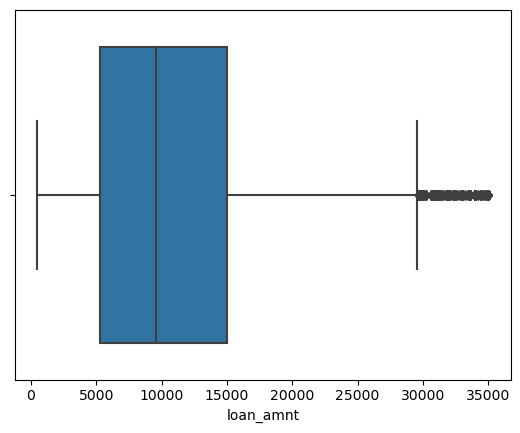

Boxplot of  int_rate


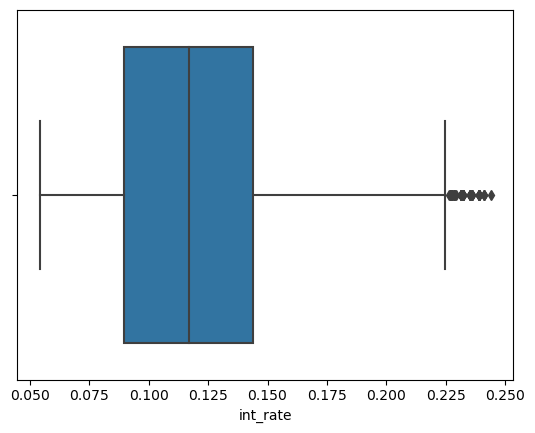

Boxplot of  installment


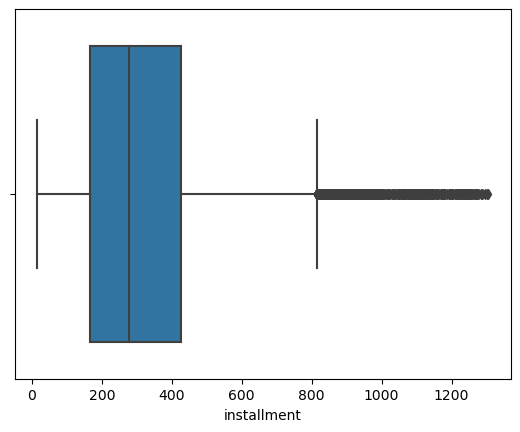

Boxplot of  annual_inc


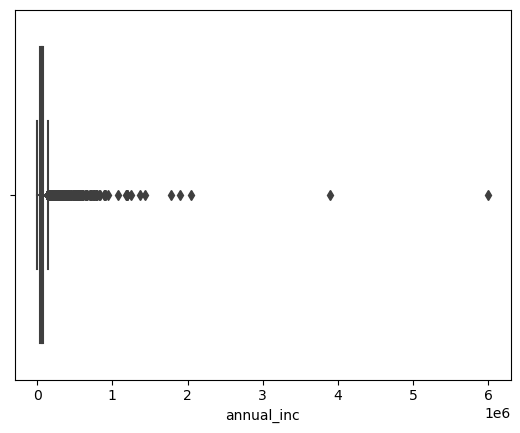

Boxplot of  dti


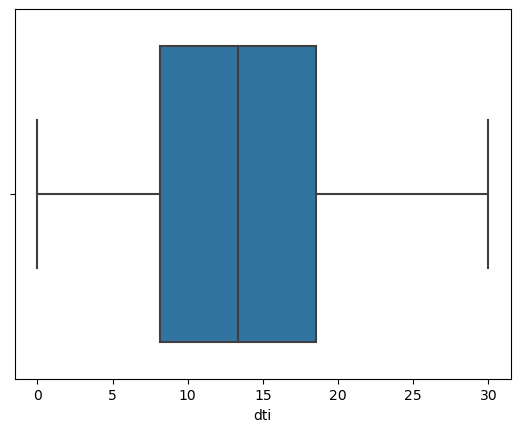

Boxplot of  revol_bal


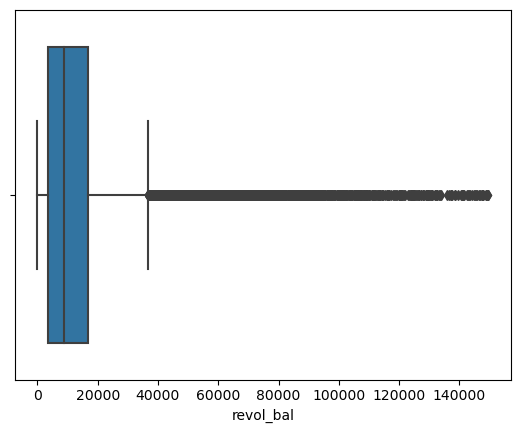

Boxplot of  revol_util


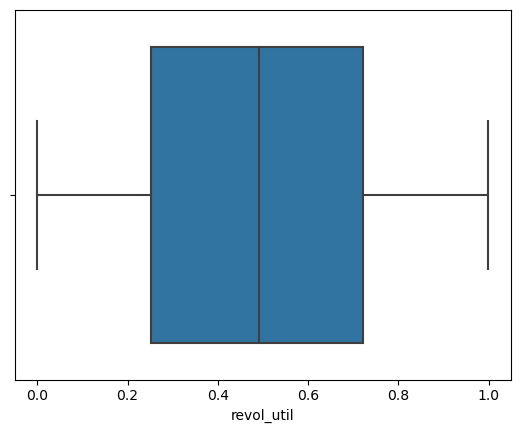

In [23]:
for i in df.select_dtypes(include='float').columns.to_list():
    print("Boxplot of ",i)
    sns.boxplot(x=df[i])
    plt.show()

In [24]:
x=round(df.select_dtypes(include='float').describe(percentiles=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]).T,2)
x['UCL']=round(x['75%']+1.5*(x['75%']-x['25%']),2) #UCL = Q3 + 1.5*IQR
x

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,max,UCL
loan_amnt,38577.0,11047.03,7348.44,500.00,2400.00,3090.00,5300.00,9600.00,15000.00,21600.00,25000.00,35000.00,29550.00
int_rate,38577.0,0.12,0.04,0.05,0.06,0.07,0.09,0.12,0.14,0.17,0.18,0.24,0.22
installment,38577.0,322.47,208.64,15.69,70.61,98.99,165.74,277.86,425.55,620.90,760.82,1305.19,815.27
annual_inc,38577.0,68777.97,64218.68,4000.00,24000.00,30000.00,40000.00,58868.00,82000.00,115000.00,140004.00,6000000.00,145000.00
dti,38577.0,13.27,6.67,0.00,2.10,4.06,8.13,13.37,18.56,22.29,23.80,29.99,34.20
revol_bal,38577.0,13289.49,15866.49,0.00,312.00,1099.00,3650.00,8762.00,16912.00,28972.00,41356.20,149588.00,36805.00
revol_util,38577.0,0.49,0.28,0.00,0.03,0.08,0.25,0.49,0.72,0.88,0.94,1.00,1.42


- Columns to be capped at UCL (upper control limit): ['loan_amnt', 'int_rate', 'installment', 'annual_inc']
- Columns to be capped at 95% (as UCL < 95%) : ['revol_bal']. To ensure not to heavily bias the column. Will result in some outliers in box plot.
- Columns NOT to be treated (as UCL > Max): ['dti', 'revol_util']
- Columns NOT to be treated (as UCL = Min, seems to be a categorical in nature. showing as float due to NaN values): ['pub_rec_bankruptcies']

In [25]:
def cap_column(column, method='IQR',multiple=1.5,percentile=0.95):
    """
    Cap values in a column of a DataFrame based on specified method.

    Parameters:
        column (series): The column to be capped (include dataframe).
        method (str): The method to use for capping. Either 'IQR' or 'PCT'.
        multiple (float): The multiple to use for 'IQR' method. Default is 1.5.
        percentile (float): The percentile to use for 'PCT' method. Default is 0.95.

    Returns:
        DataFrame: The DataFrame with values capped in the specified column.
    """
    if method == 'IQR':
        Q1 = column.quantile(0.25)
        Q3 = column.quantile(0.75)
        IQR = Q3 - Q1
        threshold = Q3 + multiple * IQR
    elif method == 'PCT':
        threshold = column.quantile(percentile)
    else:
        raise ValueError("Invalid method. Please specify either 'IQR' or 'PCT'.")
    
    # Cap values in the column using clip()
    column = column.clip(upper=threshold)
    
    return column

In [26]:
df['loan_amnt']=cap_column(df['loan_amnt'],'IQR')
df['int_rate']=cap_column(df['int_rate'],'IQR')
df['installment']=cap_column(df['installment'],'IQR')
df['annual_inc']=cap_column(df['annual_inc'],'IQR')
df['revol_bal']=cap_column(df['revol_bal'],'PCT')    

In [27]:
df['revol_bal'].describe()

count    38577.000000
mean     12067.688618
std      11091.741089
min          0.000000
25%       3650.000000
50%       8762.000000
75%      16912.000000
max      41356.200000
Name: revol_bal, dtype: float64

Boxplot of  loan_amnt


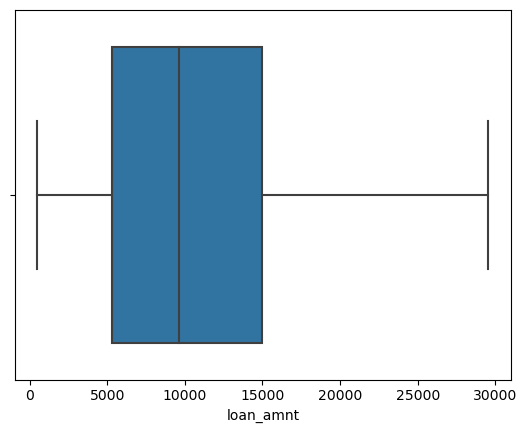

Boxplot of  int_rate


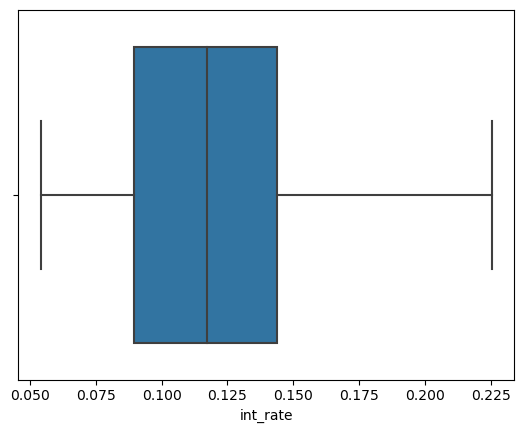

Boxplot of  installment


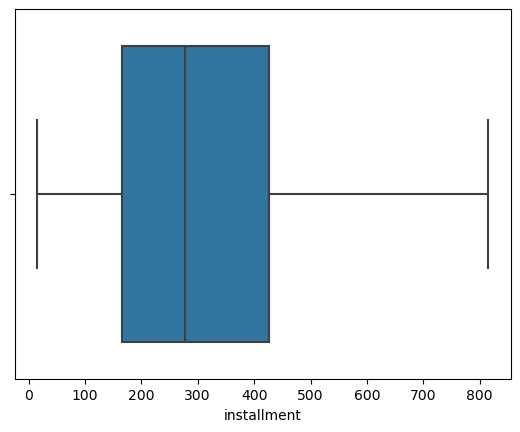

Boxplot of  annual_inc


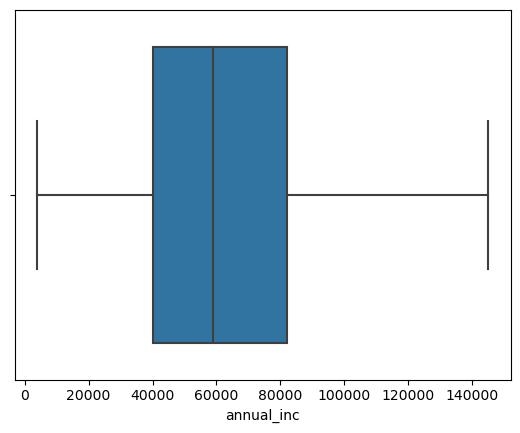

Boxplot of  dti


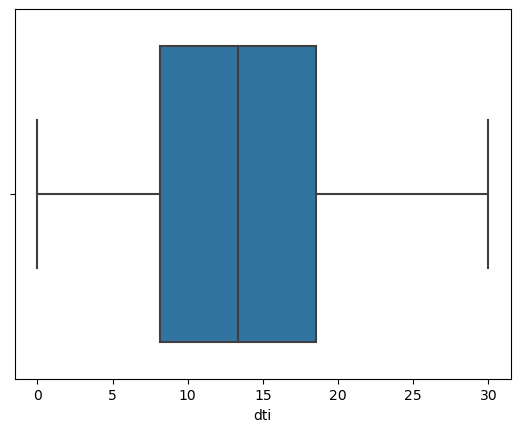

Boxplot of  revol_bal


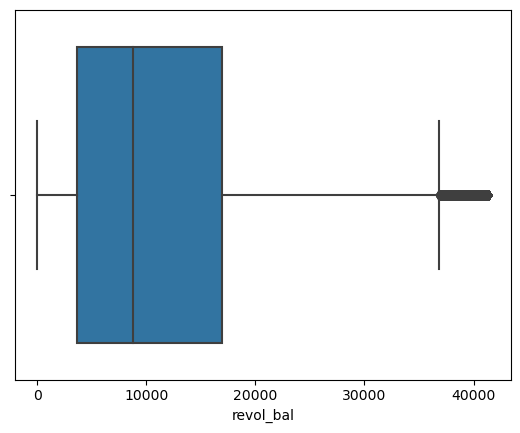

Boxplot of  revol_util


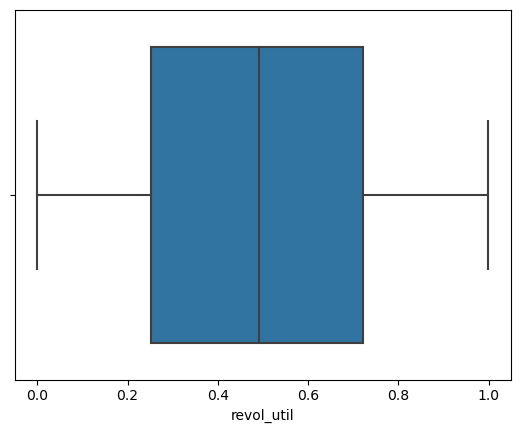

In [28]:
#Checking to see how the box plot looks post adjustment. 
#As expected, 'revol_bal' has some outliers as capping was done at 95th percentile and UCL < 95th Percentile
for i in df.select_dtypes(include='float').columns.to_list():
    print("Boxplot of ",i)
    sns.boxplot(x=df[i])
    plt.show()

__1.10.2 Int Columns:__

In [29]:
x=round(df.select_dtypes(include='int').describe(percentiles=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95, 0.99]).T,2)
pd.concat([x,df.select_dtypes(include='int').nunique().rename('unique_count')],axis=1)

,count,mean,std,min,5%,10%,25%,50%,75%,90%,95%,99%,max,unique_count
open_acc,38577.0,9.28,4.40,2.0,3.0,4.0,6.0,9.0,12.0,15.0,17.0,22.0,44.0,40
pub_rec,38577.0,0.06,0.24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0,5
total_acc,38577.0,22.05,11.43,2.0,7.0,9.0,13.0,20.0,29.0,38.0,43.0,56.0,90.0,82
pub_rec_bankruptcies,38577.0,0.04,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3
issue_d_year,38577.0,2010.31,0.88,2007.0,2009.0,2009.0,2010.0,2011.0,2011.0,2011.0,2011.0,2011.0,2011.0,5
issue_d_month,38577.0,7.11,3.41,1.0,1.0,2.0,4.0,7.0,10.0,12.0,12.0,12.0,12.0,12
earliest_cr_line_year,38577.0,1996.83,7.38,1969.0,1984.0,1988.0,1993.0,1998.0,2001.0,2004.0,2006.0,2007.0,2068.0,53
earliest_cr_line_month,38577.0,6.89,3.54,1.0,1.0,2.0,4.0,7.0,10.0,12.0,12.0,12.0,12.0,12


For earliest_cr_line_year, the max year showing up as 2068 seems to be wrong. Let's explore more

In [30]:
df['earliest_cr_line_year'].value_counts().sort_index()

1969      37
1970      47
1971      45
1972      49
1973      61
1974      62
1975      83
1976      93
1977     112
1978     161
1979     157
1980     175
1981     181
1982     215
1983     322
1984     395
1985     439
1986     478
1987     590
1988     709
1989     834
1990    1005
1991     945
1992    1029
1993    1460
1994    1948
1995    2078
1996    2202
1997    2387
1998    2773
1999    2896
2000    3160
2001    2462
2002    1890
2003    1813
2004    1727
2005    1467
2006    1154
2007     698
2008     153
2046       1
2050       1
2054       2
2056       1
2059       1
2061       2
2062       5
2063      10
2064       6
2065       8
2066      11
2067      18
2068      19
Name: earliest_cr_line_year, dtype: int64

This shows that we have values where year > 2008. This is because of the way python interpreted dates when we converted the source date variable 'earliest_cr_line' from string to date. Python uses a 68 year cutoff, so for the current year, if the YY value <=68 it will treat it as the current century while anything greater than that as previous century. For our purposes, we'll need to set the century as 20th century for any year having value > current year.

In [31]:
df.loc[df['earliest_cr_line_year'] > 2024, 'earliest_cr_line_year'] -= 100 #reducing year by 100 to reset it to 20th century
df['earliest_cr_line_year'].value_counts().sort_index()

1946       1
1950       1
1954       2
1956       1
1959       1
1961       2
1962       5
1963      10
1964       6
1965       8
1966      11
1967      18
1968      19
1969      37
1970      47
1971      45
1972      49
1973      61
1974      62
1975      83
1976      93
1977     112
1978     161
1979     157
1980     175
1981     181
1982     215
1983     322
1984     395
1985     439
1986     478
1987     590
1988     709
1989     834
1990    1005
1991     945
1992    1029
1993    1460
1994    1948
1995    2078
1996    2202
1997    2387
1998    2773
1999    2896
2000    3160
2001    2462
2002    1890
2003    1813
2004    1727
2005    1467
2006    1154
2007     698
2008     153
Name: earliest_cr_line_year, dtype: int64

### 1.11) Derive categorical columns by grouping categories of a text column or binning any numeric columns


#### Text Variables:

In [32]:
#df.dtypes.sort_values()
df.select_dtypes(exclude=['int','float']).nunique().sort_values()

term                    2
loan_status             2
verification_status     3
home_ownership          5
grade                   7
emp_length             12
purpose                14
sub_grade              35
addr_state             50
dtype: int64

- Columns __'sub_grade'__ and __'addr_state'__ have more than 15 unique categories. Let's explore them further
- For __'sub_grade'__ - let's see if we can extract any other variable from it
- For __'addr_state'__ we might want to explore Top N states [By: #loans_issued, #charged_off_loans, %Charged_off_loans] later

<Axes: xlabel='count', ylabel='sub_grade_level'>

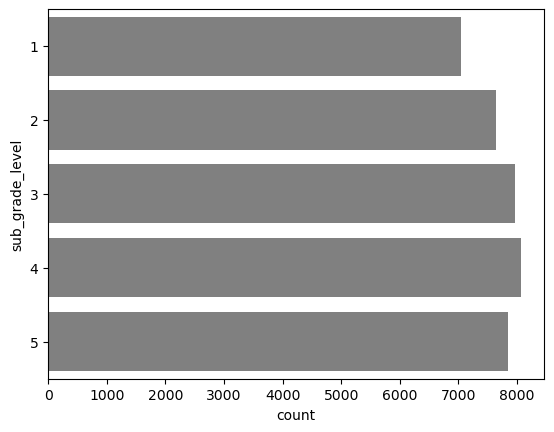

In [33]:
#'sub-grade'
df['sub_grade'].value_counts().sort_index() #Every grade seems to have 5 sub_levels. Let's extract the same.
df['sub_grade_level']=df['sub_grade'].str[-1].astype(int)
sns.countplot(y=df['sub_grade_level'], color='grey')

#### Numeric Variables:

In [34]:
df.select_dtypes(include=['int','float']).nunique().sort_values()

pub_rec_bankruptcies          3
pub_rec                       5
issue_d_year                  5
sub_grade_level               5
issue_d_month                12
earliest_cr_line_month       12
open_acc                     40
earliest_cr_line_year        53
total_acc                    82
int_rate                    360
loan_amnt                   827
revol_util                 1088
dti                        2853
annual_inc                 4818
installment               14452
revol_bal                 19401
dtype: int64

Columns with unique count < 12 can be treated as categorical variables.
For those with number of unique values > 12, we might want to look at their histogram plot to see if we want to derive categorical variables from them.

In [35]:
def show_num_univariate_plot(col):
    plt.figure(figsize=(10, 4))

    #Display describe function output
    plt.subplot2grid((2,2),(0,0),colspan=2)
    
    col_stat=round(col.describe(percentiles=[0.05, 0.10, 0.25, 0.50, 0.75, 0.90, 0.95]),2).to_frame().T
    col_stat['UCL']=round(col_stat['75%']+1.5*(col_stat['75%']-col_stat['25%']),2) #UCL = Q3 + 1.5*IQR
    col_stat['mode']=round(col.mode().iloc[0],2)

    plt.axis('off')  # Turn off axis
    table=plt.table(cellText=col_stat.values,  colLabels=col_stat.columns, rowLabels=[col.name], loc='center')
    table.scale(1,2)
    table.auto_set_font_size(False)
    table.set_fontsize(8.5)

    #Histogram Plot
    plt.subplot2grid((2,2),(1,0))
    plt.title("Histogram for: "+col.name)
    sns.histplot(x=col)

    #Box Plot
    plt.subplot2grid((2,2),(1,1))
    plt.title("Boxplot for: "+col.name)
    sns.boxplot(x=col)

    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

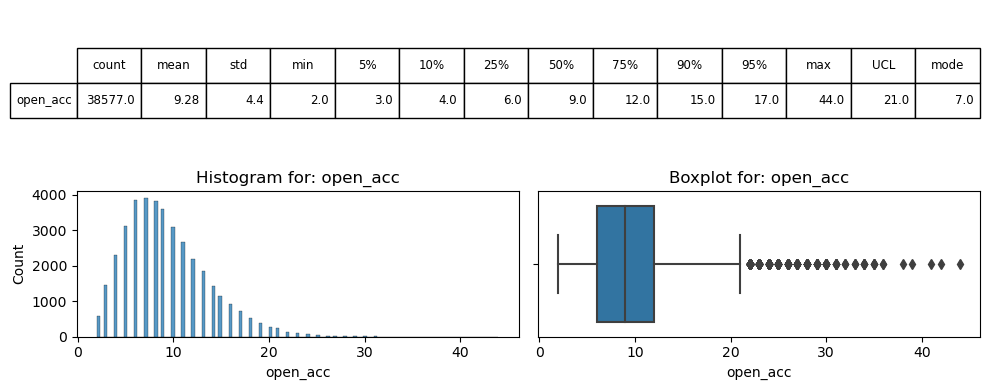

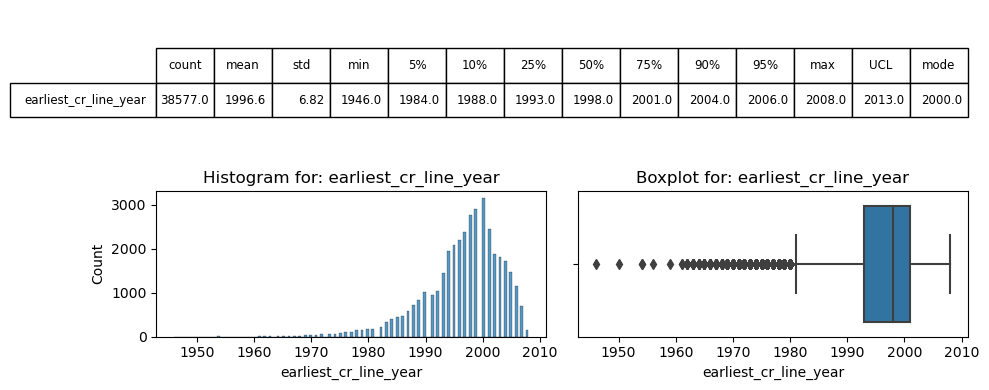

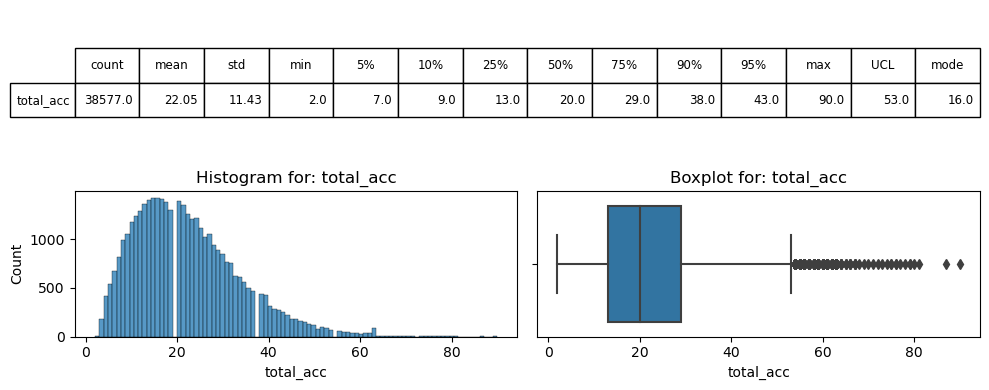

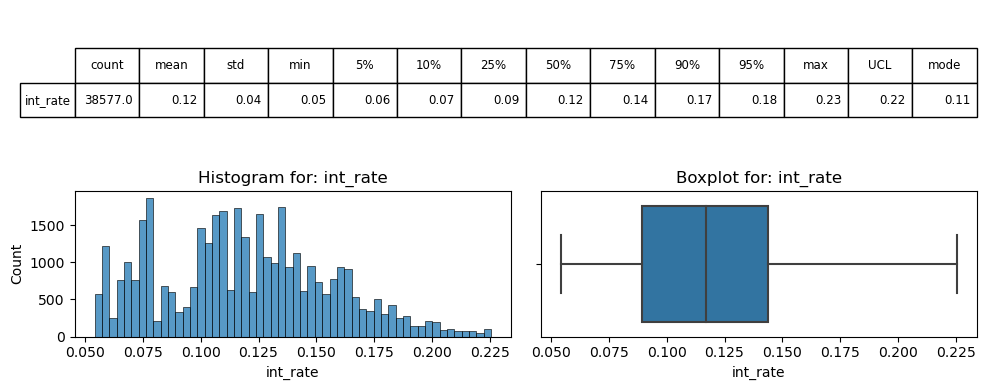

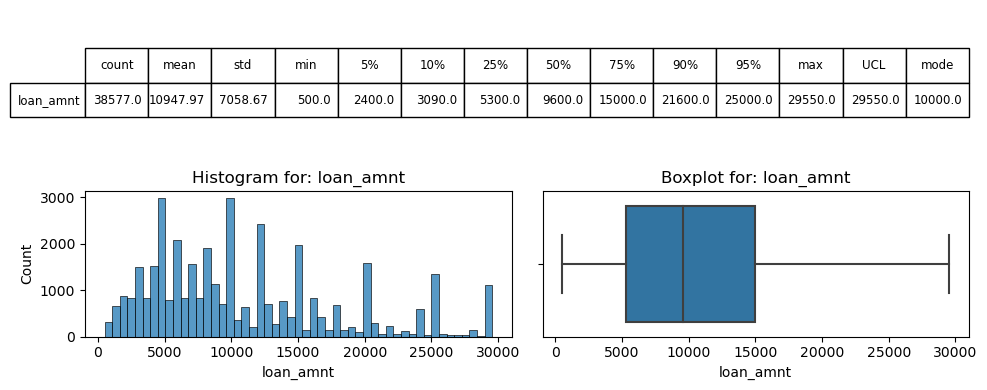

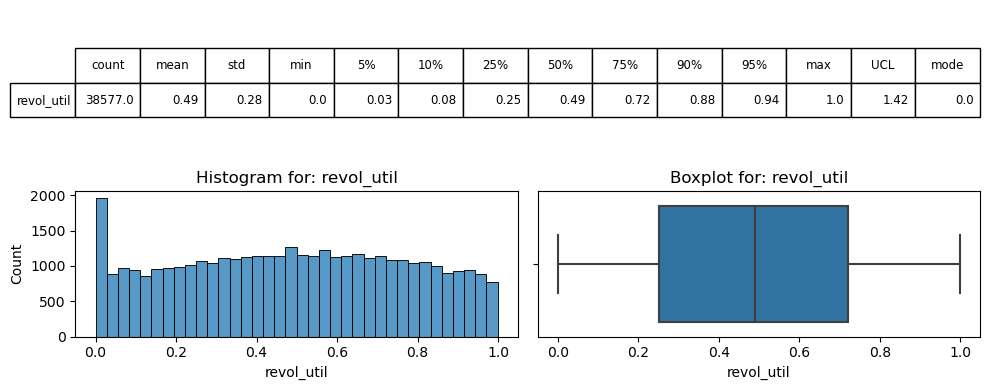

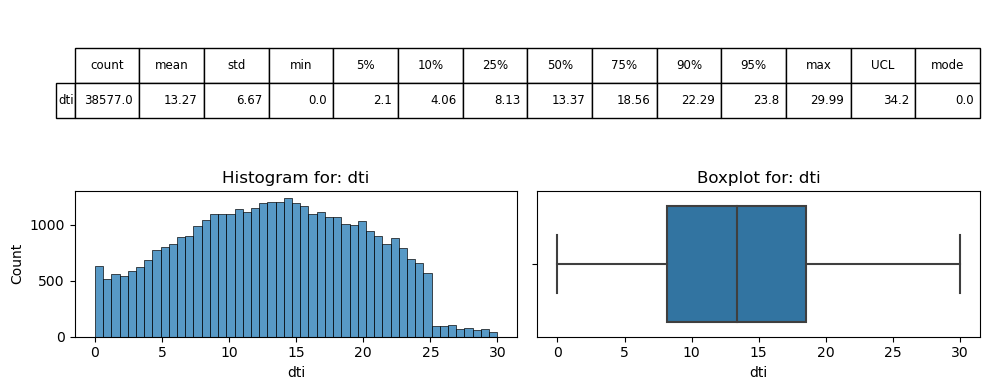

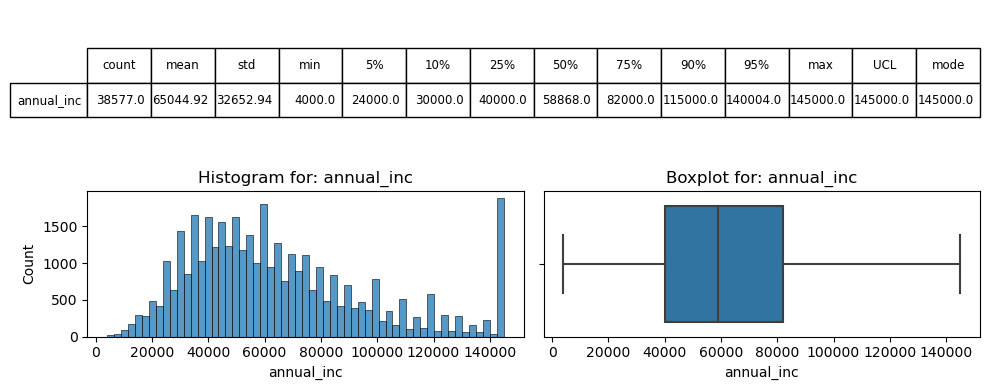

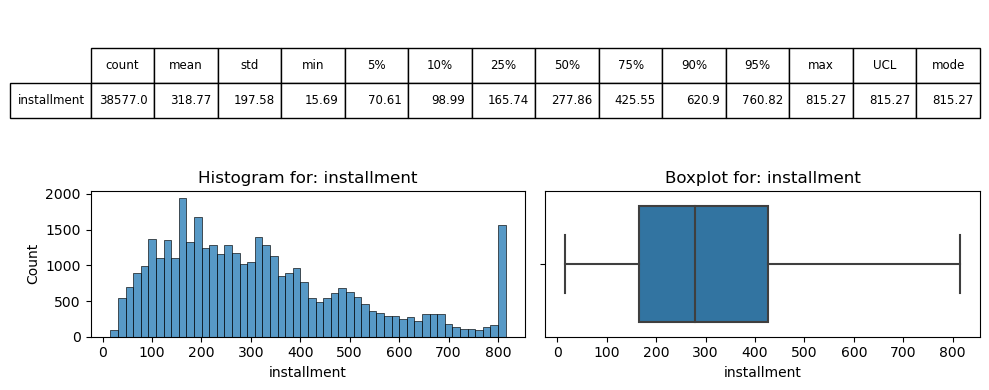

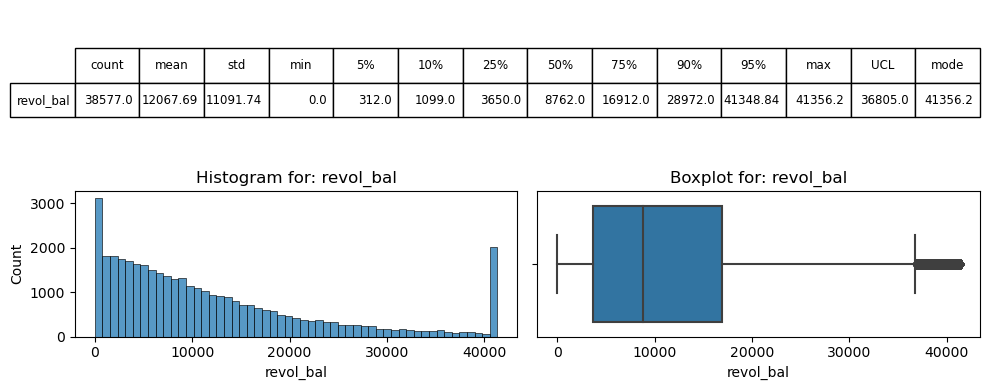

In [36]:
#Checking to see how the histogram plot looks for numeric variables with number of unique values > 12
cols=df.select_dtypes(include=['int','float']).nunique().sort_values()

for i in cols[cols>12].index.to_list():
    show_num_univariate_plot(df[i])

These columns can be converted into categorical columns as:
- __open_acc:__ '<3', '3-6','6-9', '9-12', '12-15', '15-21', '>=21'
- __earliest_cr_line_year:__ '<1984', '1984-1993','1993-1998', '1998 - 2001','2001-2006', '>=2006'
- __total_acc:__ '<7', '7-13', '13-20', '20-29', '29-43', '>=43'
- __int_rate:__ '<6%', '6%-7.5%', '7.5%-9%','9%-12%', '12%-15%', '15%-18%', '>=18%'
- __loan_amnt:__ '<2400', '2400-5300', '5300-9600', '9600-15000', '15000-25000', '>=25000'
- __revol_util:__ '<3%', '3%-8%', '8%-25%', '25%-50%', '50%-72%', '72%-94%', '>=94%'
- __dti:__ '<2%', '2%-5%', '5%-8%', '8%-13%', '13%-18%', '18%-24%'. '>=24%'
- __annual_inc:__ '<24K','24K-30K', '30K-40K', '40K-60K','60K-120K', '>=120K'
- __installment:__ '<75','75-125','125-175','175-250','250-350','350-450','450-600','600-750','>=750'
- __revol_bal:__ '<300','300-1000','1000-3500','3500-7500','7500-15000','15000-35000','>=35000'

In [37]:
# Define the bin edges and labels
open_acc_bin_edges = [0, 3, 6, 9, 12, 15, 21, float('inf')]
open_acc_bin_labels = ['<3', '3-6', '6-9', '9-12', '12-15', '15-21', '>=21']
df['open_acc_buckets'] = pd.cut(df['open_acc'], bins=open_acc_bin_edges, labels=open_acc_bin_labels, right=False)

earliest_cr_line_year_edges = [0, 1984, 1993, 1998, 2001, 2006, float('inf')]
earliest_cr_line_year_labels = ['<1984', '1984-1993','1993-1998', '1998 - 2001','2001-2006', '>=2006']
df['earliest_cr_line_year_buckets'] = pd.cut(df['earliest_cr_line_year'], bins=earliest_cr_line_year_edges, labels=earliest_cr_line_year_labels, right=False)

total_acc_bin_edges = [0, 7, 13, 20, 29, 43, float('inf')]
total_acc_bin_labels = ['<7', '7-13', '13-20', '20-29', '29-43', '>=43']
df['total_acc_buckets'] = pd.cut(df['total_acc'], bins=total_acc_bin_edges, labels=total_acc_bin_labels, right=False)

int_rate_bin_edges = [0, 0.06, 0.075, 0.10, 0.12, 0.15, 0.18, float('inf')]
int_rate_bin_labels = ['<6%', '6%-7.5%', '7.5%-10%','10%-12%', '12%-15%', '15%-18%', '>=18%']
df['int_rate_buckets'] = pd.cut(df['int_rate'], bins=int_rate_bin_edges, labels=int_rate_bin_labels, right=False)

loan_amnt_bin_edges = [0, 2400, 5300, 9600, 15000, 25000, float('inf')]
loan_amnt_bin_labels = ['<2400', '2400-5300', '5300-9600', '9600-15000', '15000-25000', '>=25000']
df['loan_amnt_buckets'] = pd.cut(df['loan_amnt'], bins=loan_amnt_bin_edges, labels=loan_amnt_bin_labels, right=False)

revol_util_bin_edges = [0, 0.03, 0.08, 0.25, 0.5, 0.72, 0.94, float('inf')]
revol_util_bin_labels = ['<3%', '3%-8%', '8%-25%', '25%-50%', '50%-72%', '72%-94%', '>=94%']
df['revol_util_buckets'] = pd.cut(df['revol_util'], bins=revol_util_bin_edges, labels=revol_util_bin_labels, right=False)

dti_bin_edges = [0, 2, 5, 8, 13, 18, 24, float('inf')]
dti_bin_labels = ['<2%', '2%-5%', '5%-8%', '8%-13%', '13%-18%', '18%-24%', '>=24%']
df['dti_buckets'] = pd.cut(df['dti'], bins=dti_bin_edges, labels=dti_bin_labels, right=False)

annual_inc_bin_edges = [0, 24000, 30000, 40000, 60000, 90000, 120000, float('inf')]
annual_inc_bin_labels = ['<24K','24K-30K', '30K-40K', '40K-60K','60K-90K', '90K-120K', '>=120K']
df['annual_inc_buckets'] = pd.cut(df['annual_inc'], bins=annual_inc_bin_edges, labels=annual_inc_bin_labels, right=False)

installment_bin_edges = [0, 75, 125, 175, 250, 350, 450, 600, 750, float('inf')]
installment_bin_labels = ['<75','75-125','125-175','175-250','250-350','350-450','450-600','600-750','>=750']
df['installment_buckets'] = pd.cut(df['installment'], bins=installment_bin_edges, labels=installment_bin_labels, right=False)

revol_bal_bin_edges = [0, 300, 1000, 3500, 7500, 15000, 35000, float('inf')]
revol_bal_bin_labels = ['<300','300-1000','1000-3500','3500-7500','7500-15000','15000-35000','>=35000']
df['revol_bal_buckets'] = pd.cut(df['revol_bal'], bins=revol_bal_bin_edges, labels=revol_bal_bin_labels, right=False)

In [38]:
#As our main focus is to understand the characteristics of Charged_off Loans, creating a dummy variable for it.
df['is_charged_off'] = (df['loan_status'] == 'Charged Off').astype(int)
round(df['is_charged_off'].mean()*100,2) # Approx. 14.6% of accounts in this dataset have been charged off

14.59

### 1.12 Classify the columns as categorical, numerical or Others(columns that needn't be analyzed due to either being verbose or duplicate as info from these columns have already been extracted in other columns). 

- __Discrete numeric:__
    ['is_charged_off', 'pub_rec_bankruptcies', 'earliest_cr_line_month', 'issue_d_month', 'issue_d_year', 
                    'total_acc', 'pub_rec', 'open_acc', 'earliest_cr_line_year','sub_grade_level']

- __Continuous Numerical:__
    ['revol_util', 'revol_bal', 'dti', 'loan_amnt', 'annual_inc', 'installment', 'int_rate']
    
- __Object_Categorical:__ 
    ['term','loan_status','verification_status','home_ownership',
                   'grade','emp_length','purpose']
    
- __Categorical:__ 
    ['open_acc_buckets','earliest_cr_line_year_buckets', 'total_acc_buckets', 'int_rate_buckets', 
                   'loan_amnt_buckets','revol_util_buckets','dti_buckets', 'annual_inc_buckets','installment_buckets', 
                   'revol_bal_buckets'] 

- __Other:__
    ['sub_grade','addr_state']

In [39]:
#Grouping the columns
# Breaking Discrete numeric into ones which can be treated as categorical and those which were binned due to multiple values
num_ctg_col = ['is_charged_off', 'pub_rec_bankruptcies', 'earliest_cr_line_month', 'issue_d_month', 'issue_d_year', 
              'pub_rec','sub_grade_level']

discrete_num_col = ['total_acc','open_acc','earliest_cr_line_year']

cont_num_col = ['revol_util', 'revol_bal', 'dti', 'loan_amnt', 'annual_inc', 'installment', 'int_rate']

non_num_ctg_col = ['term','loan_status','verification_status','home_ownership',
                   'grade','emp_length','purpose']

num_bin_ctg_col = ['open_acc_buckets','earliest_cr_line_year_buckets', 'total_acc_buckets', 'int_rate_buckets', 
                   'loan_amnt_buckets','revol_util_buckets','dti_buckets', 'annual_inc_buckets','installment_buckets', 
                   'revol_bal_buckets'] 

other_col = ['sub_grade','addr_state']
ctg_col = non_num_ctg_col + num_ctg_col + num_bin_ctg_col
num_col = discrete_num_col + cont_num_col

loan_attr = ['loan_amnt', 'term',  'installment', 'verification_status', 'purpose', 'int_rate', 'issue_d_month', 'issue_d_year', 'grade']
customer_attr = ['open_acc', 'pub_rec_bankruptcies','revol_util', 'revol_bal', 'dti','home_ownership', 'annual_inc','emp_length']

### 1.13 Running countplot for categorical columns

Countplot of  term


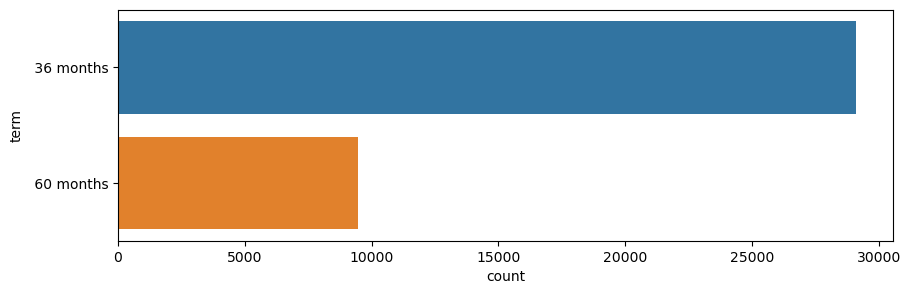

Countplot of  loan_status


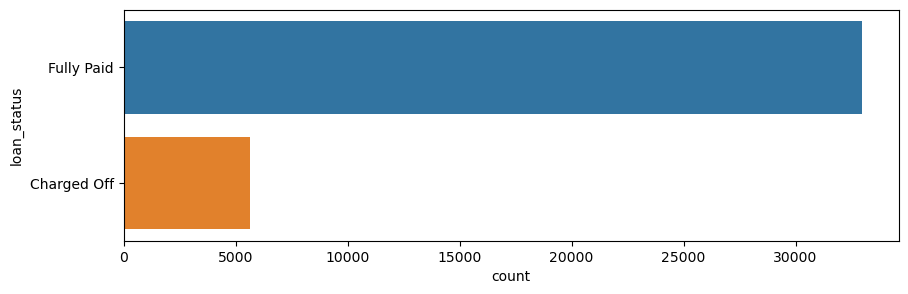

Countplot of  verification_status


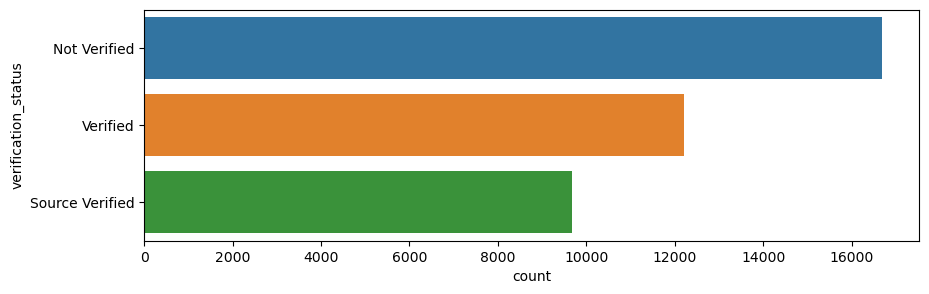

Countplot of  home_ownership


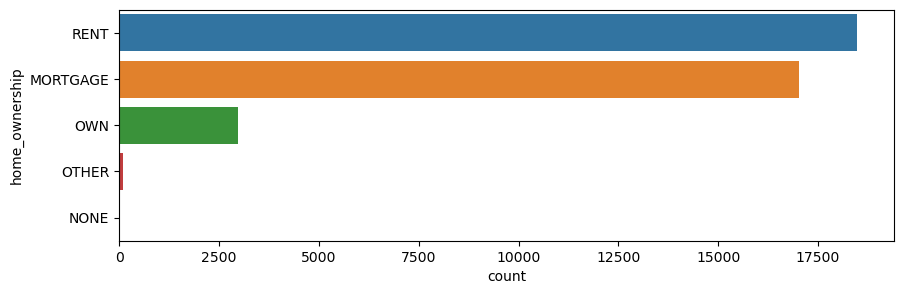

Countplot of  grade


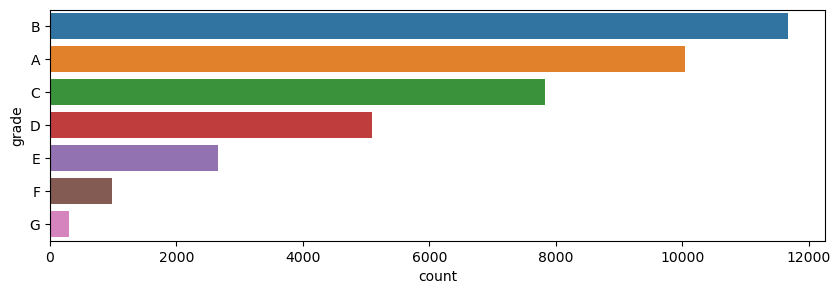

Countplot of  emp_length


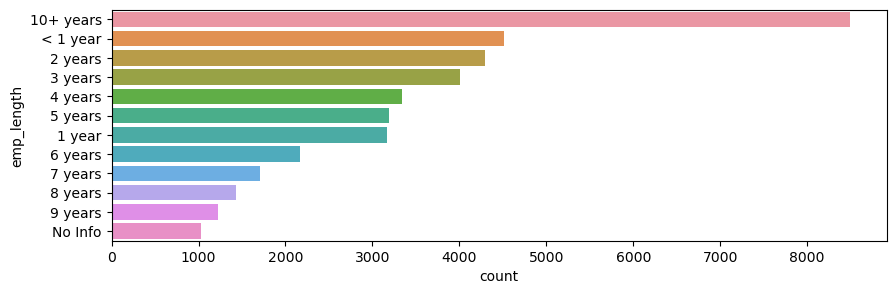

Countplot of  purpose


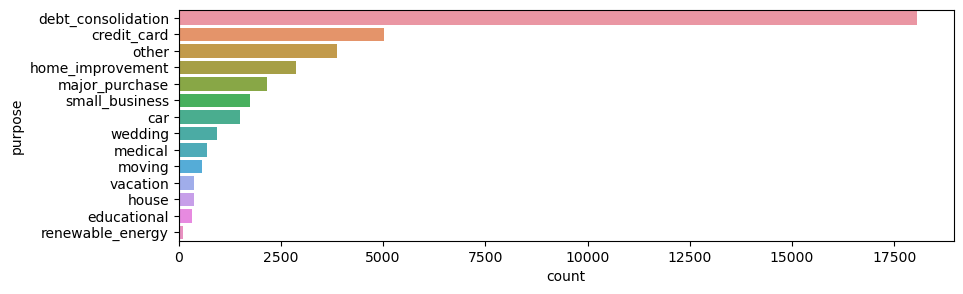

Countplot of  is_charged_off


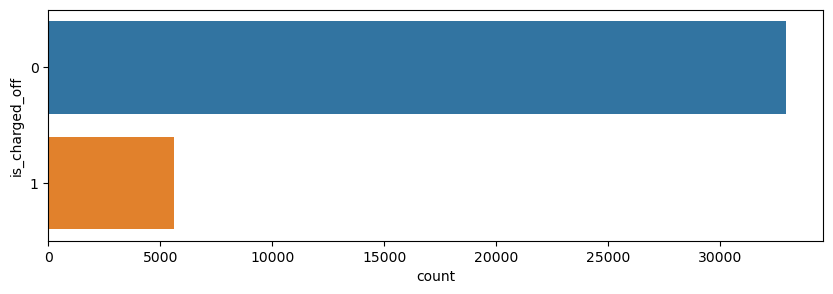

Countplot of  pub_rec_bankruptcies


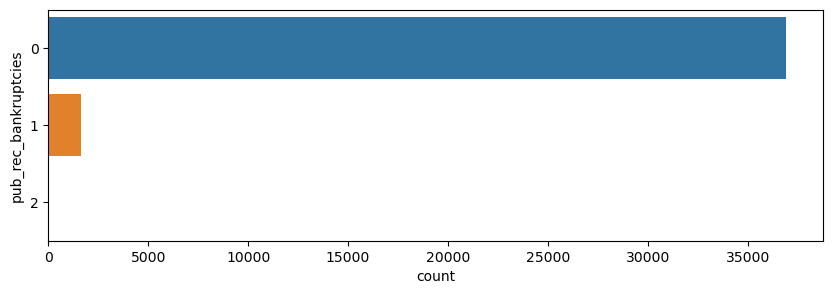

Countplot of  earliest_cr_line_month


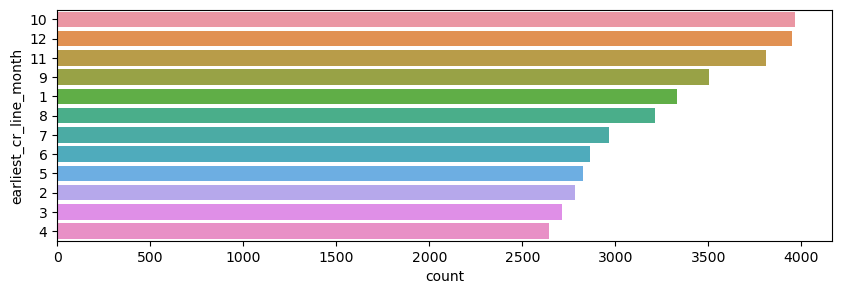

Countplot of  issue_d_month


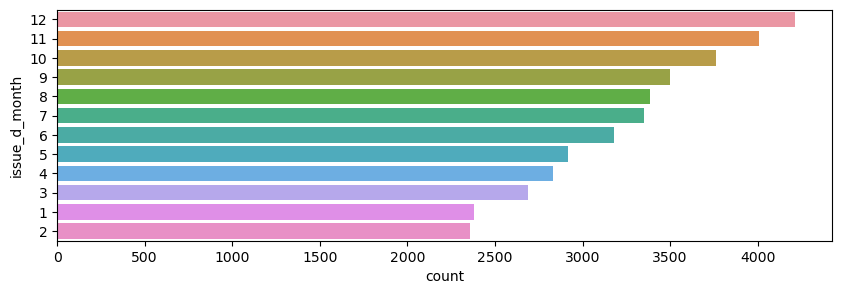

Countplot of  issue_d_year


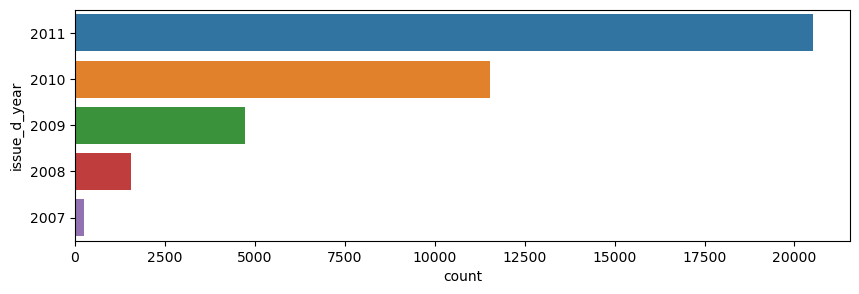

Countplot of  pub_rec


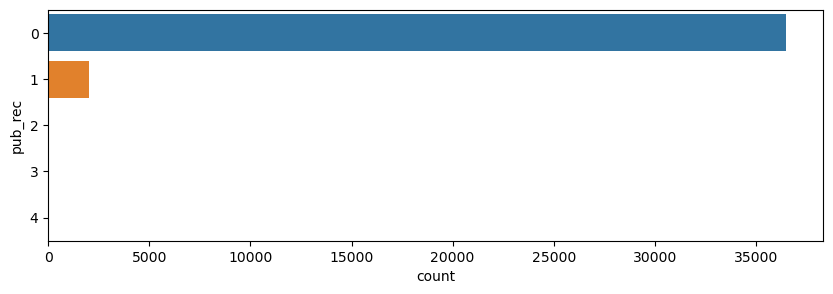

Countplot of  sub_grade_level


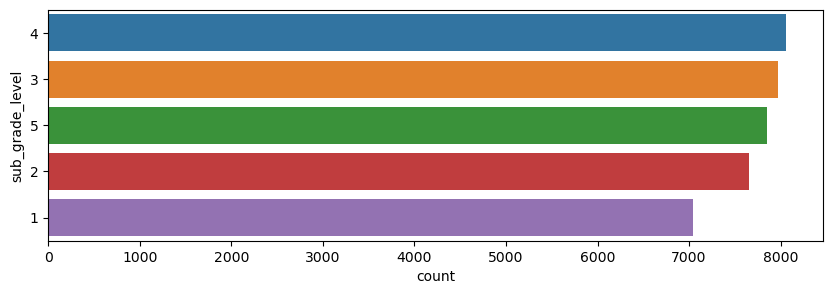

Countplot of  open_acc_buckets


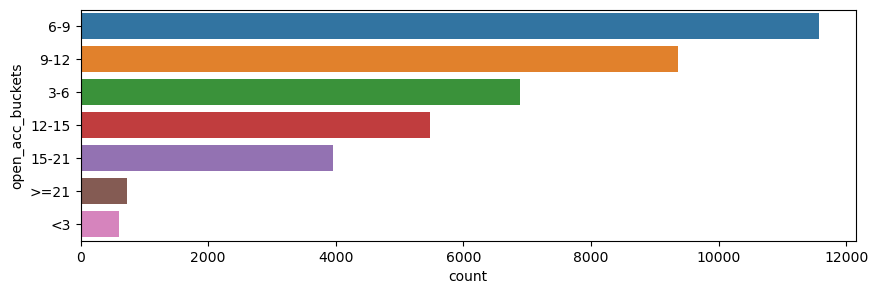

Countplot of  earliest_cr_line_year_buckets


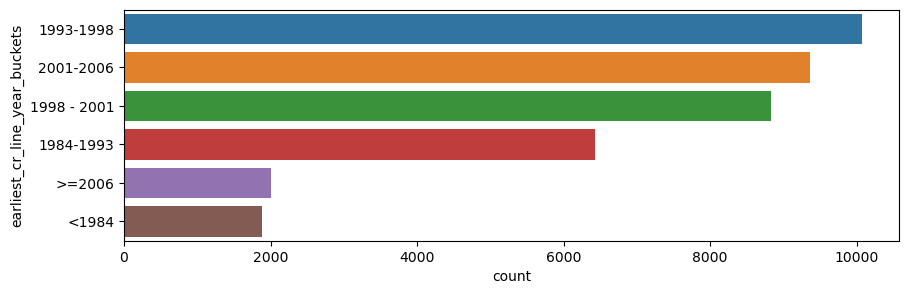

Countplot of  total_acc_buckets


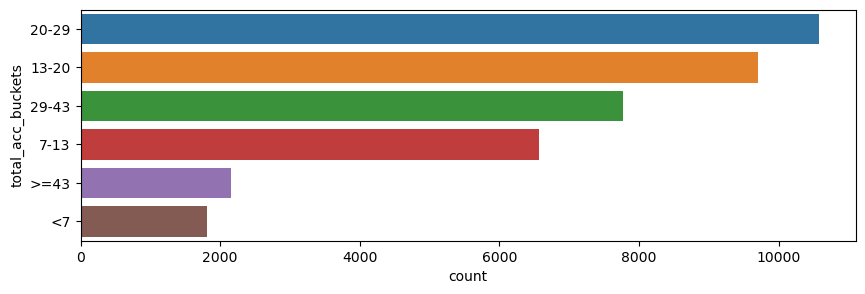

Countplot of  int_rate_buckets


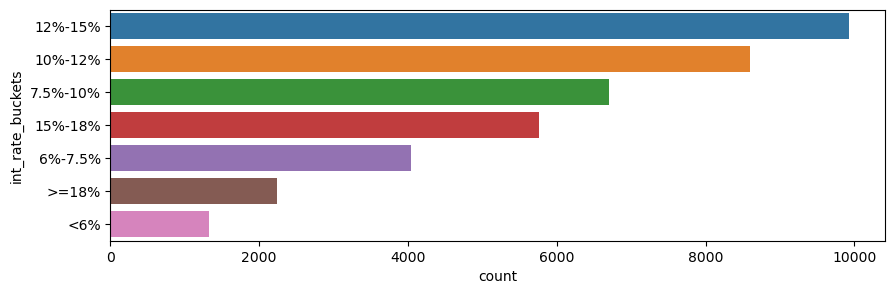

Countplot of  loan_amnt_buckets


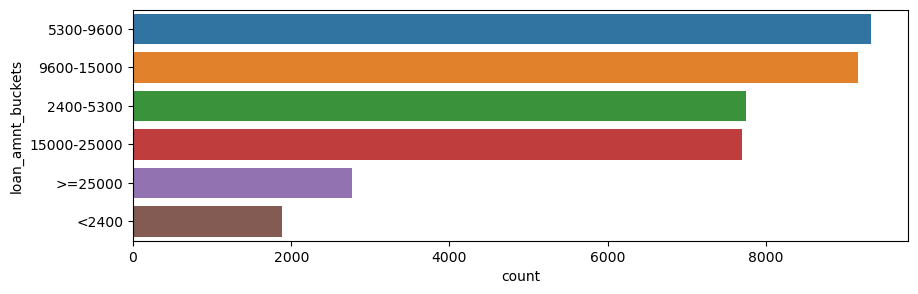

Countplot of  revol_util_buckets


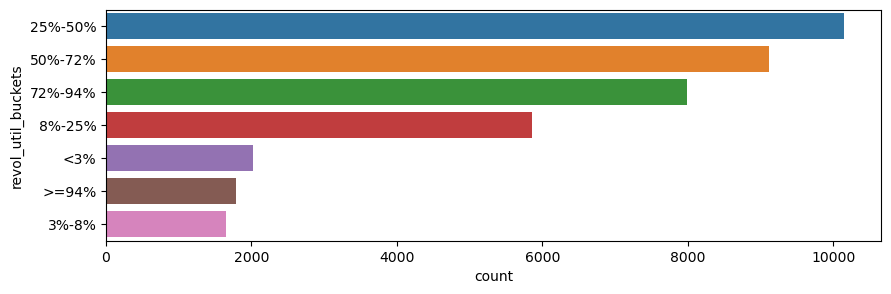

Countplot of  dti_buckets


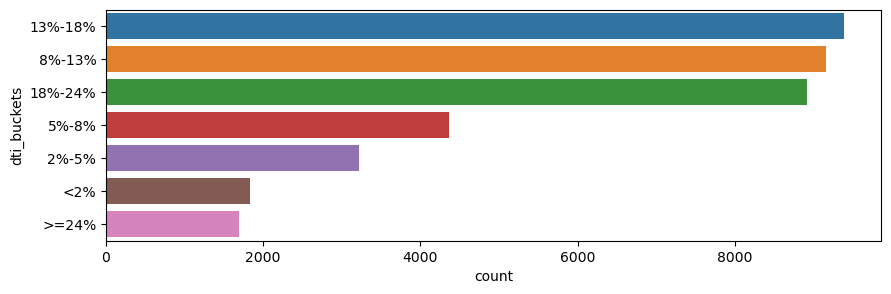

Countplot of  annual_inc_buckets


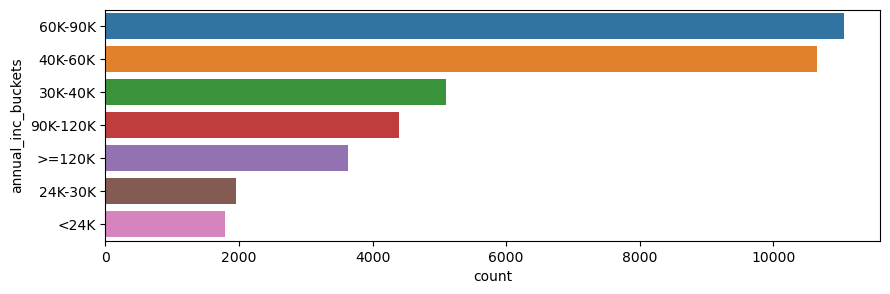

Countplot of  installment_buckets


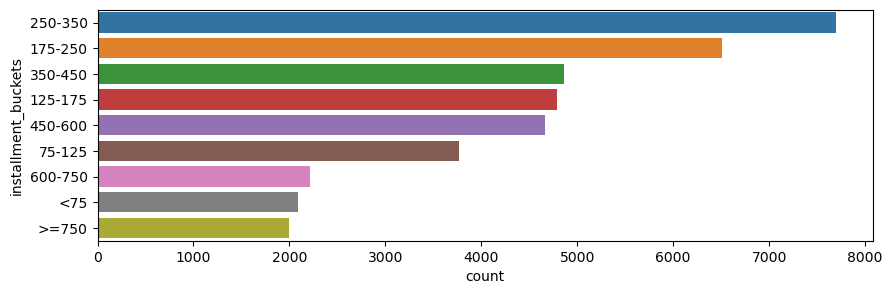

Countplot of  revol_bal_buckets


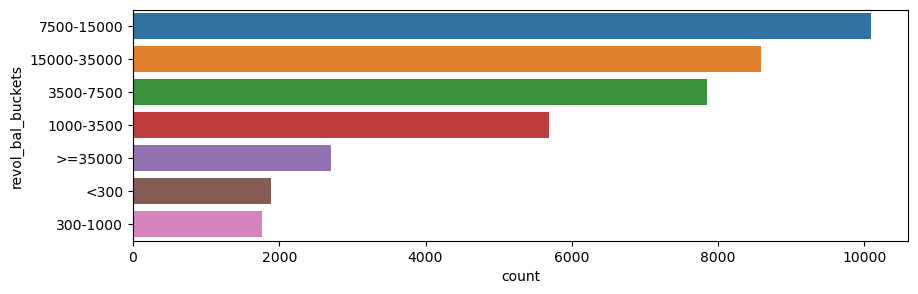

In [40]:
for i in ctg_col:
    plt.figure(figsize=(10, 3))
    print("Countplot of ",i)
    sns.countplot(y=df[i], order=df[i].value_counts().index.tolist())
    plt.show()

### Observation:

- __Term:__ Shorter term loans are more popular than longer term loans
- __Verification_Status:__ Applications with verification_status have been given highest number of loans
- __Home_Ownership:__ Highest number of loans approved are for applicants living on Rent
- __Grade:__  Interestingly, Grade B loans are higher than Grade A  (why?) while rest of the loans reduce with grade.
- __emp_length:__ Maximum loans have been disbursed to applicants with emp_length > 10 years of <=1 year. Need to check purpose
- __purpose:__ 'Debt Consolidation' is the largest reason for loan
- __issue_d_month:__ Number of loans issued increase with increase in month number except Feb which has least number of loans probably because it has least number of days
- __issue_d_year:__ Number of loans seem to be increasing on an annual basis. Most likely due to company expansion

## 2 Segmented Univariate, Bi-Variate and Multivariate Analysis

### 2.1 Segmented Univariate

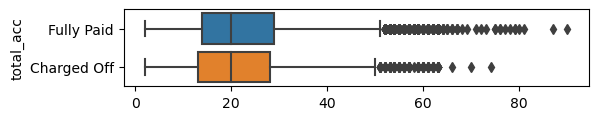

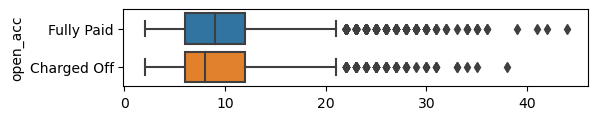

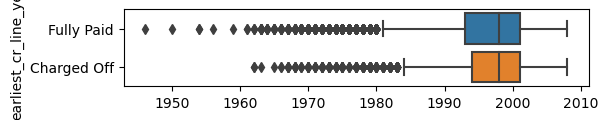

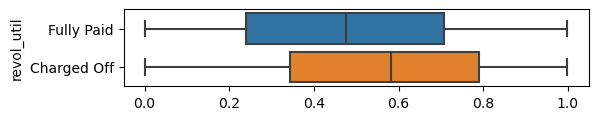

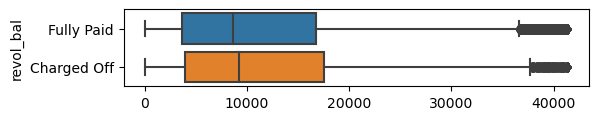

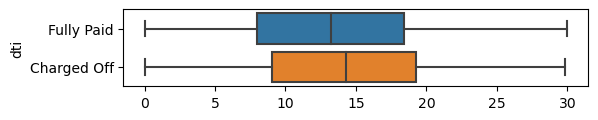

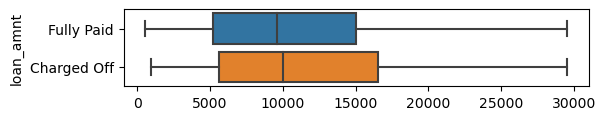

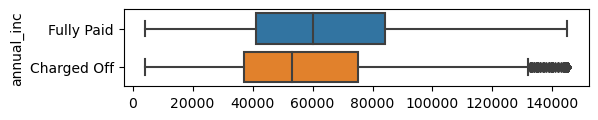

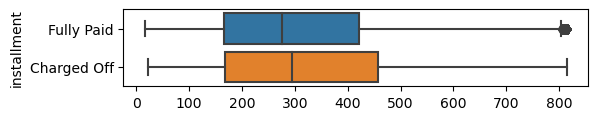

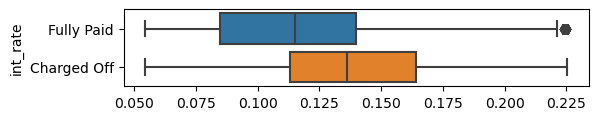

In [41]:
for i in num_col:
    plt.figure(figsize=(6, 1))
    sns.boxplot(x=df[i],y=df['loan_status'])
    plt.ylabel(i)
    plt.xlabel('')
    plt.show()

### Observations:

- Charged_off loans tend to have higher revol_util than those who fully paid
- dti of Charged_off loans seems to be higher than those who fully paid loans
- annual_inc of Charged_off loans seems to be lower than Fully Paid loans
- installment amount tends to be higher for Charged_off loans than Fully Paid ones
- Interest rate for Charged_off loans is significantly higher than Fully Paid ones

Percentage of Charged_Off loan accounts spread across  term


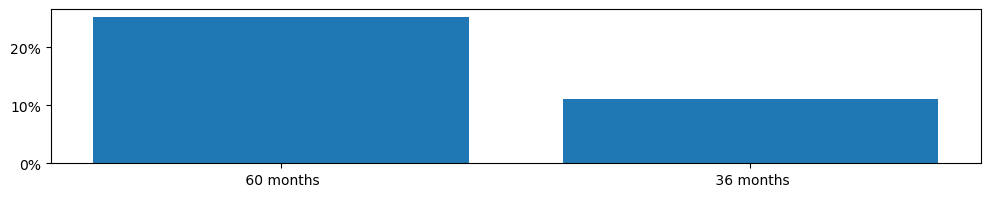

Percentage of Charged_Off loan accounts spread across  verification_status


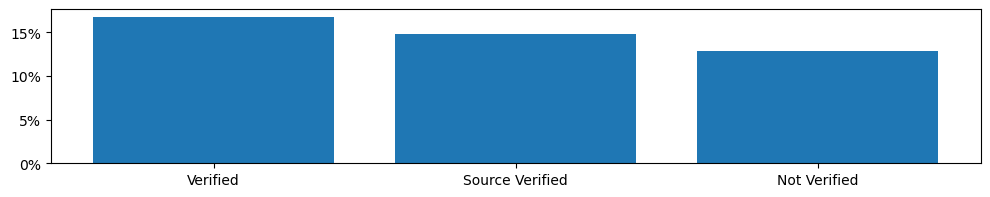

Percentage of Charged_Off loan accounts spread across  home_ownership


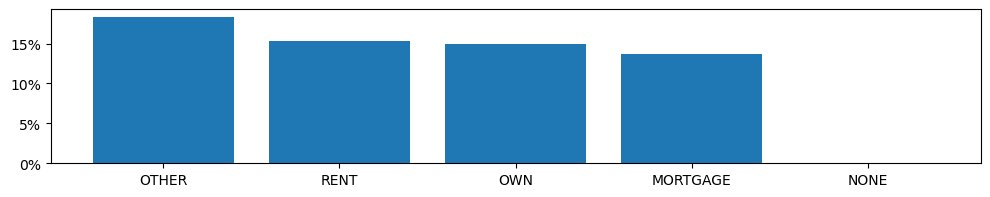

Percentage of Charged_Off loan accounts spread across  grade


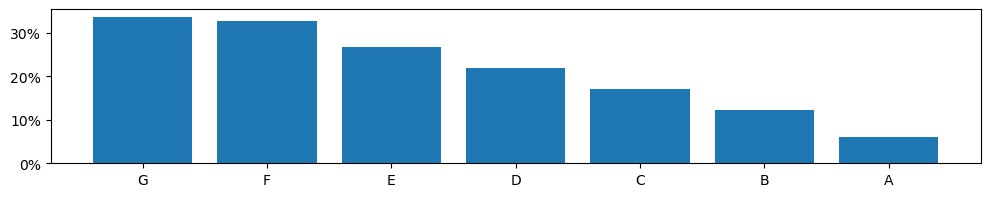

Percentage of Charged_Off loan accounts spread across  emp_length


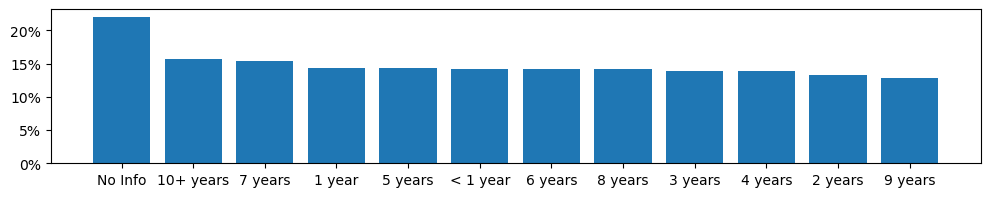

Percentage of Charged_Off loan accounts spread across  purpose


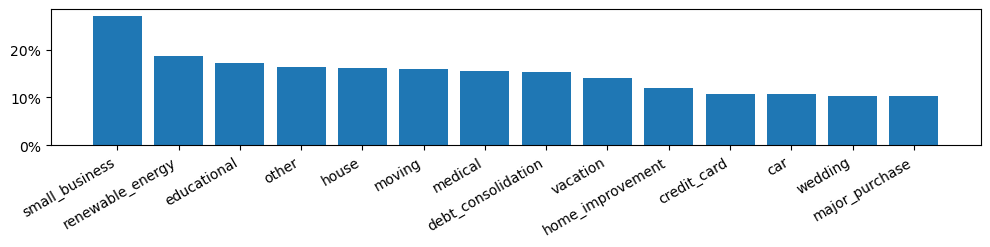

Percentage of Charged_Off loan accounts spread across  pub_rec_bankruptcies


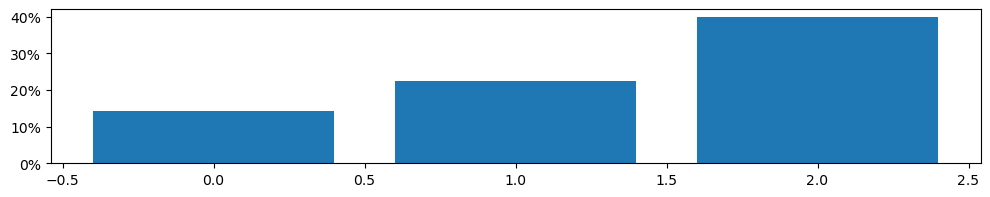

Percentage of Charged_Off loan accounts spread across  earliest_cr_line_month


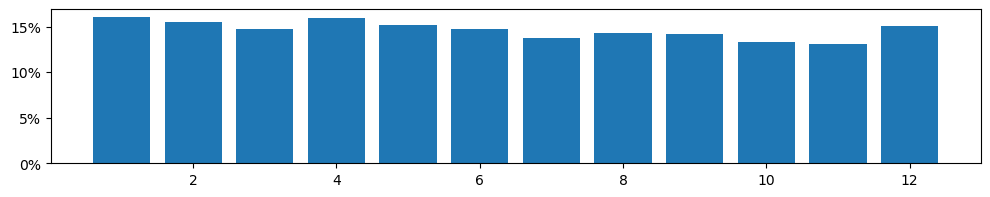

Percentage of Charged_Off loan accounts spread across  issue_d_month


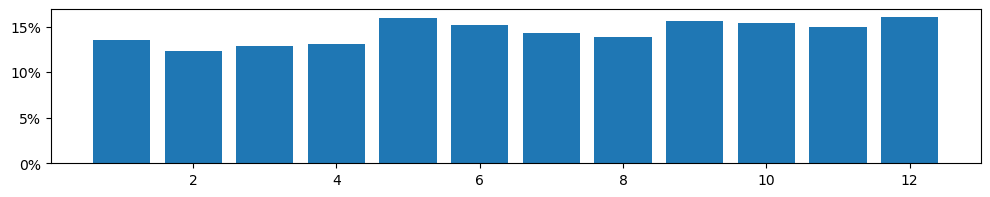

Percentage of Charged_Off loan accounts spread across  issue_d_year


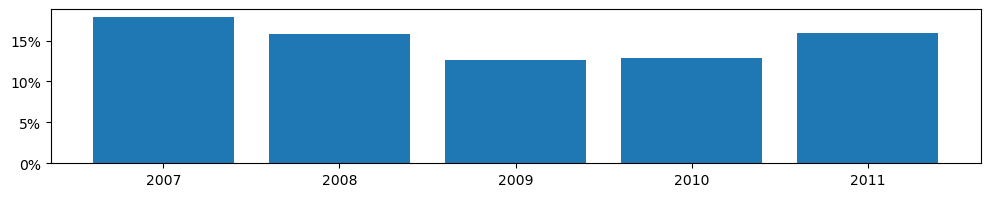

Percentage of Charged_Off loan accounts spread across  pub_rec


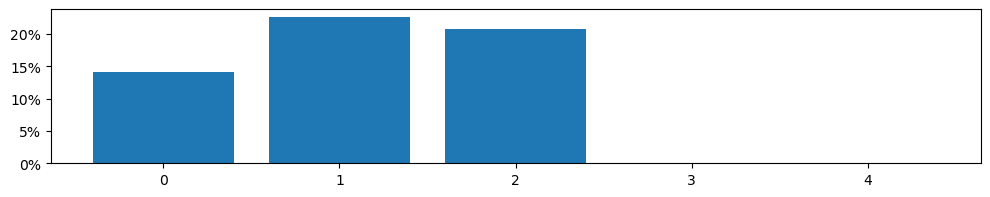

Percentage of Charged_Off loan accounts spread across  sub_grade_level


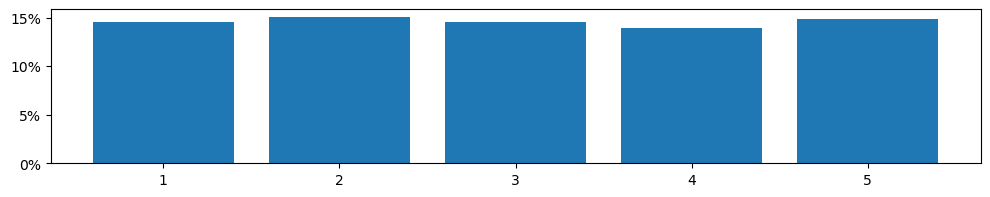

Percentage of Charged_Off loan accounts spread across  open_acc_buckets


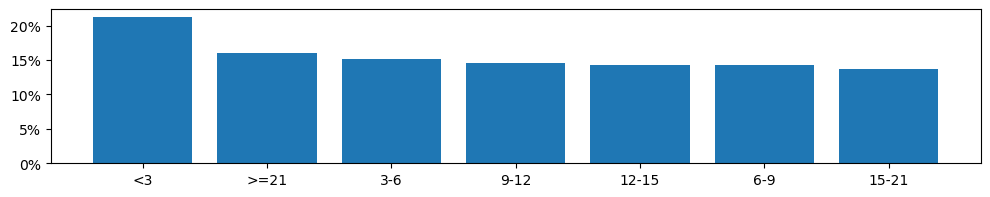

Percentage of Charged_Off loan accounts spread across  earliest_cr_line_year_buckets


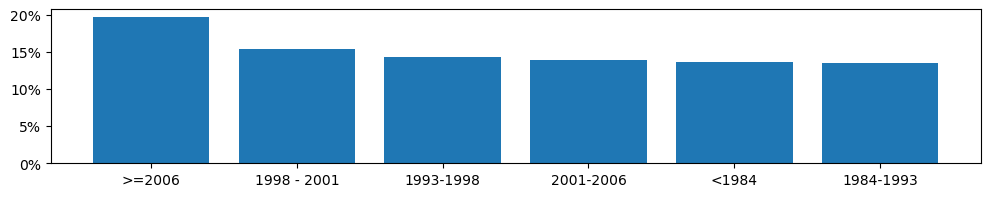

Percentage of Charged_Off loan accounts spread across  total_acc_buckets


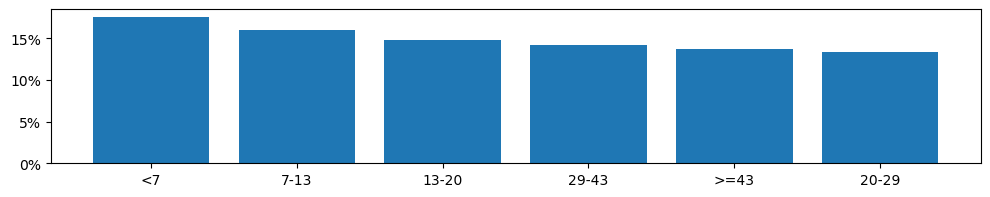

Percentage of Charged_Off loan accounts spread across  int_rate_buckets


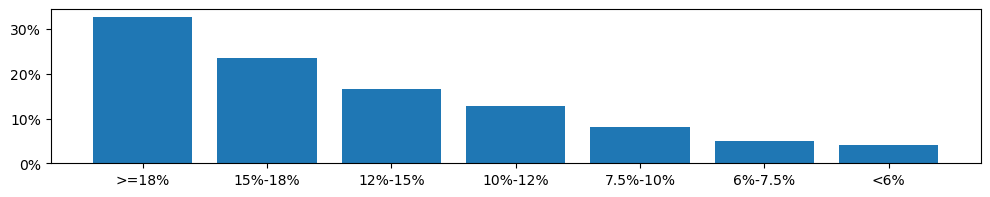

Percentage of Charged_Off loan accounts spread across  loan_amnt_buckets


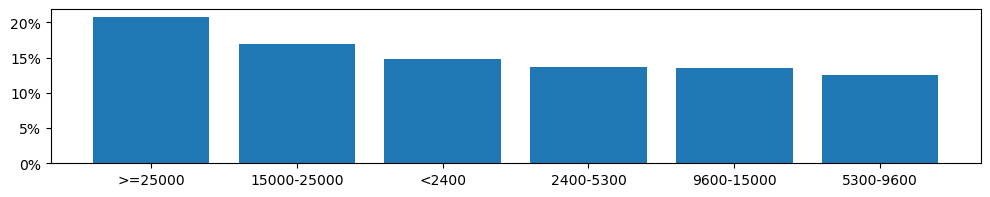

Percentage of Charged_Off loan accounts spread across  revol_util_buckets


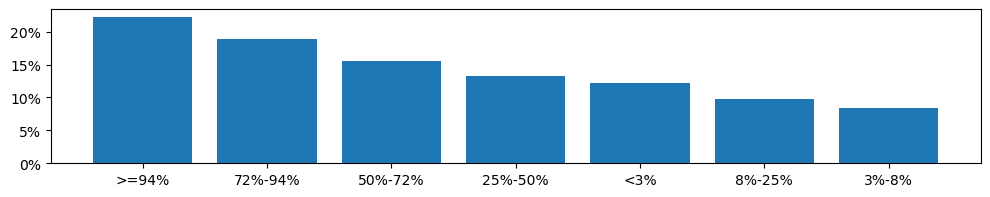

Percentage of Charged_Off loan accounts spread across  dti_buckets


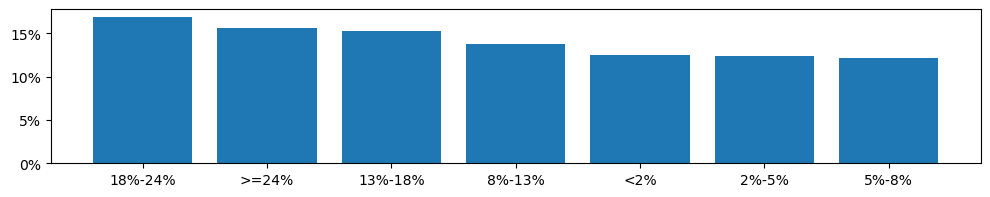

Percentage of Charged_Off loan accounts spread across  annual_inc_buckets


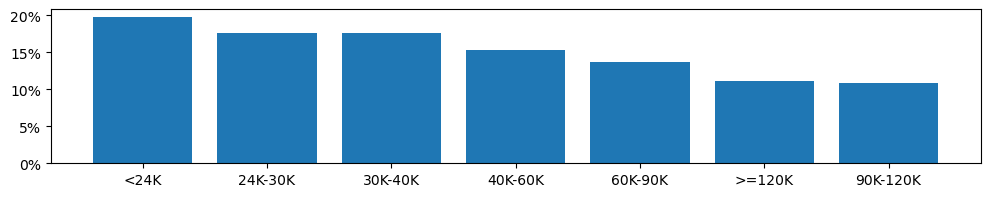

Percentage of Charged_Off loan accounts spread across  installment_buckets


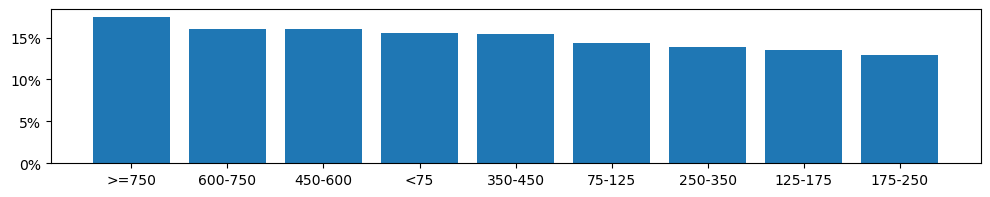

Percentage of Charged_Off loan accounts spread across  revol_bal_buckets


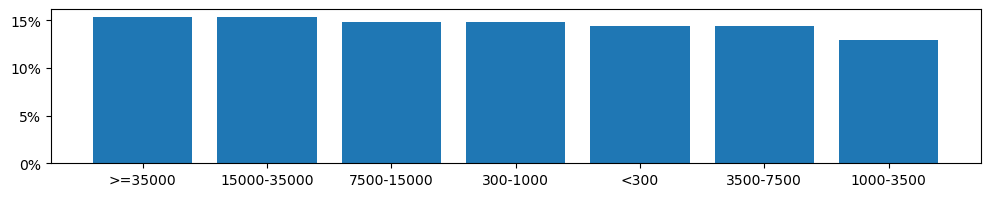

In [58]:
from matplotlib.ticker import StrMethodFormatter

for i in ctg_col:
    if i in ['loan_status', 'is_charged_off']:
        continue
    plt.figure(figsize=(12, 2))
    print('Percentage of Charged_Off loan accounts spread across ', i)
    means = df.groupby(i)['is_charged_off'].mean().sort_values(ascending=False)
    plt.bar(means.index, means.values * 100)
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%'))
    #plt.xticks(rotation=90)
    if i == 'purpose':
        plt.gcf().autofmt_xdate()
    plt.show()


Percentage of Charged_Off loan accounts spread across  term


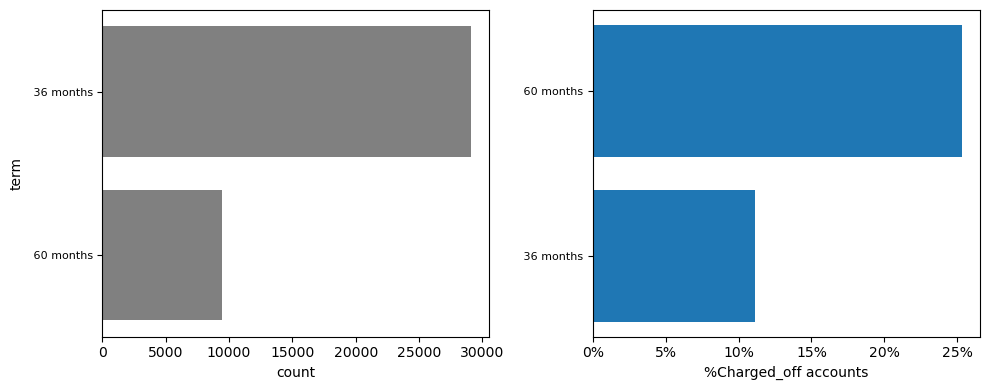

Percentage of Charged_Off loan accounts spread across  purpose


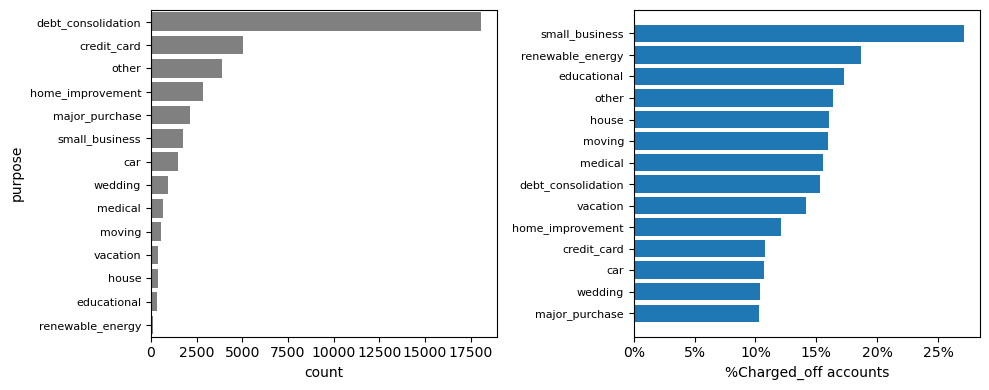

Percentage of Charged_Off loan accounts spread across  issue_d_year


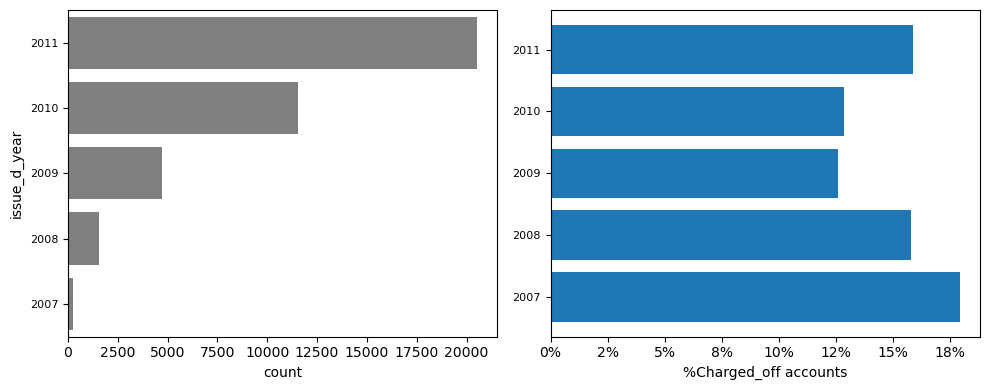

Percentage of Charged_Off loan accounts spread across  revol_util_buckets


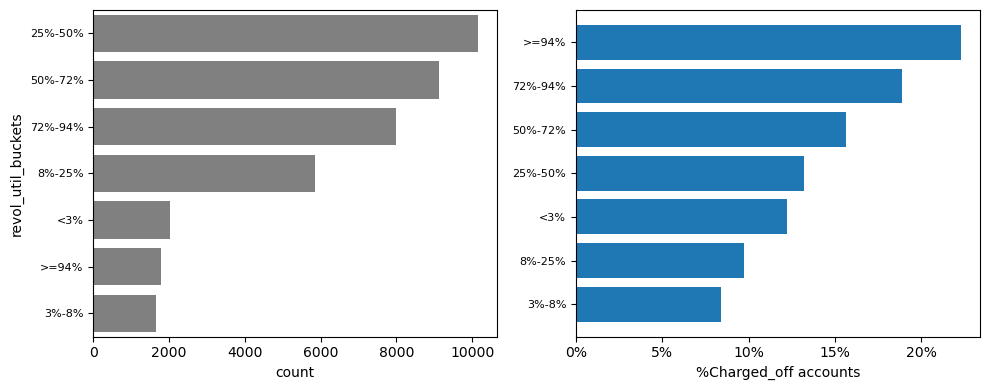

Percentage of Charged_Off loan accounts spread across  home_ownership


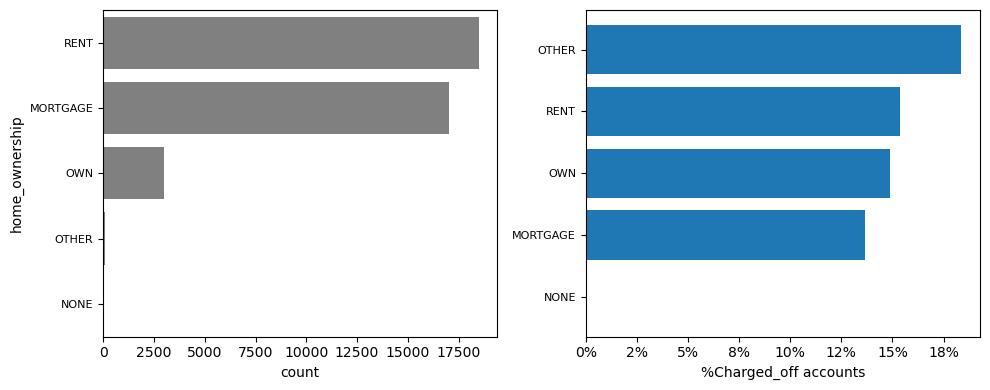

Percentage of Charged_Off loan accounts spread across  grade


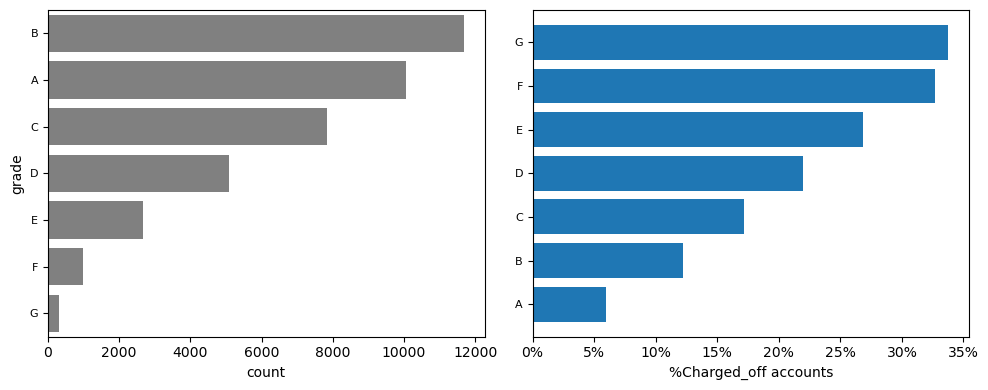

Percentage of Charged_Off loan accounts spread across  verification_status


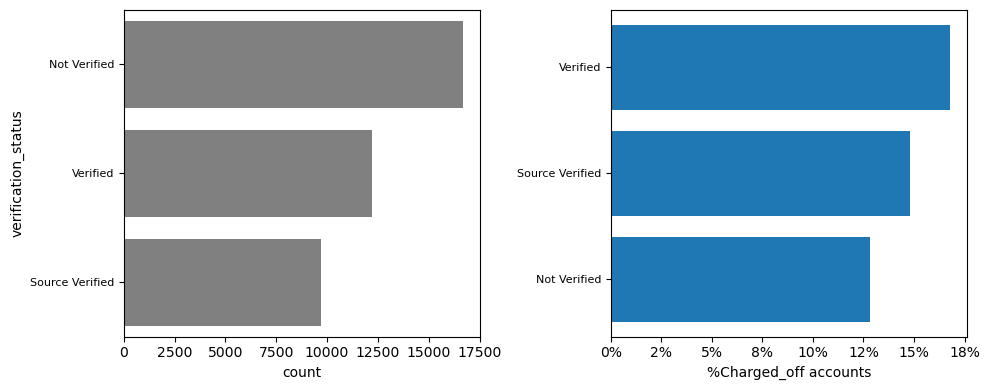

Percentage of Charged_Off loan accounts spread across  annual_inc_buckets


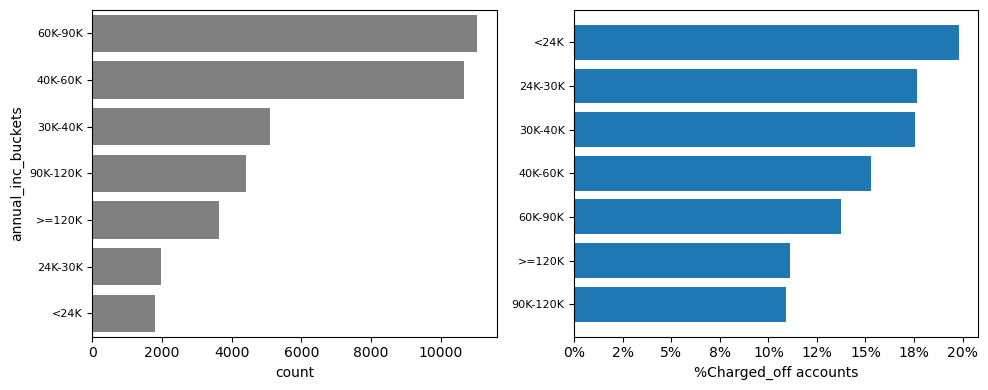

In [70]:
#'purpose', 'issue_d_year', 'revol_util_buckets', 

from matplotlib.ticker import StrMethodFormatter
for i in ['term','purpose', 'issue_d_year', 'revol_util_buckets','home_ownership','grade','verification_status','annual_inc_buckets']:
    plt.figure(figsize=(10, 4))
    plt.subplot(1,2,1)
    sns.countplot(y=df[i], order=df[i].value_counts().index.to_list(), color='grey')
    plt.tick_params(axis='y', labelsize=8)

    plt.subplot(1,2,2)
    print('Percentage of Charged_Off loan accounts spread across ',i)
    means = df.groupby(i)['is_charged_off'].mean().sort_values()
    plt.barh(means.index, means.values * 100)
    plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:.0f}%'))
    plt.xlabel('%Charged_off accounts')
    plt.tick_params(axis='y', labelsize=8)
    plt.tight_layout()
    plt.show()

### Observation:

- __Term:__ While loans disbursed for 36 months term is higher, loans for 60 months term have significantly higher percentage of charged_off Loans

- __Verification Status:__ Interestingly, accounts with a Verification status as Verified have the highest %Charged_off
- __Home_Ownership:__ Mortgage has one of the lowest Charged Off Rates
- __Grade:__ Loan Quality decreases from Grade 'A' to Grade 'G' as Charge_off rate increases from A to G
- __Purpose:__ Though Debt Consolidation has maximum loans, Small Business tends to have the highest Charge_off_rates
- __pub_rec_bankruptcies:__ Higher the number of pub_rec_bankruptcies, higher the Charge_off rates
- __int_rates:__ Higher the interest rates, higher the Charge_off rates
- __revol_util_buckets:__ Higher than average charged_off rates are seen in accounts with > 50% revol_util value
- __income_buckets:__ Medium Income buckets have highest number of loans. Higher income buckets have lowest charged_off rates compared to lower income buckets
- __issue_d_year:__ While loans issued in 2007 were the least, their charge_off rate is highest.

### 2.2 Bi-variate Analysis

In [59]:
pd.crosstab( df['issue_d_year'], df['term'])

term,36 months,60 months
issue_d_year,,
2007,251,0
2008,1562,0
2009,4716,0
2010,8466,3066
2011,14101,6415


#### Loans with term as 60 months started only from 2010. 

In [60]:
pd.crosstab( df['issue_d_year'], df['term'] ,values=df['is_charged_off']*100, aggfunc='mean').round(2)

term,36 months,60 months
issue_d_year,,
2007,17.93,NaN
2008,15.81,NaN
2009,12.60,NaN
2010,9.95,20.97
2011,10.63,27.39


- Charge off rate for terure 60 months is significantly higher than 36 month loans
- Charge off rate for 36 months tenure has been constantly dropping with the exception of 2011

In [61]:
round(pd.crosstab(df['loan_amnt_buckets'], df['term'],normalize='index')*100,2).astype(str)+'%'

term,36 months,60 months
loan_amnt_buckets,,
<2400,93.58%,6.42%
2400-5300,88.12%,11.88%
5300-9600,84.58%,15.42%
9600-15000,74.98%,25.02%
15000-25000,60.03%,39.97%
>=25000,40.84%,59.16%


In [62]:
pd.crosstab( df['loan_amnt_buckets'], df['term'] ,values=df['is_charged_off']*100, aggfunc='mean').round(2)

term,36 months,60 months
loan_amnt_buckets,,
<2400,13.82,29.75
2400-5300,12.09,25.65
5300-9600,10.45,24.11
9600-15000,10.03,24.01
15000-25000,10.84,25.98
>=25000,12.68,26.44


- __As the loan_amount increases, proportion of loans for term 60 month increases.__
- __While the Charge_Off percent for 60 month tenure > 30 month ternure, the trend with respect to loan_amount bukets seems to be the same__

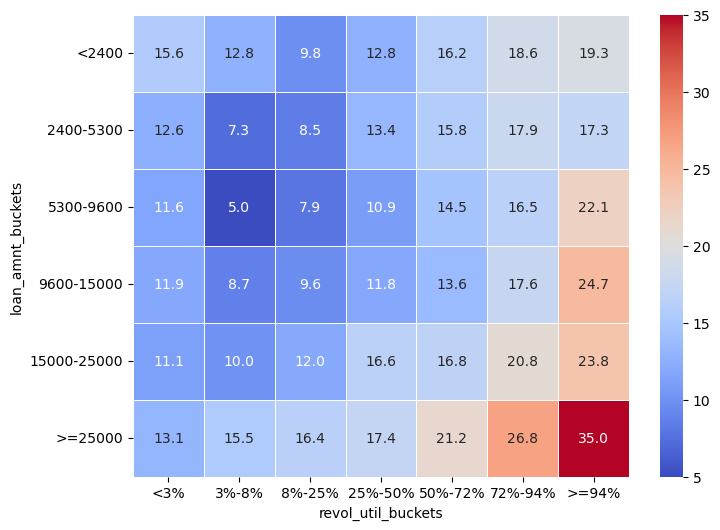

In [63]:
ct=pd.crosstab( df['loan_amnt_buckets'], df['revol_util_buckets'] ,values=df['is_charged_off']*100, aggfunc='mean').round(1)
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.show()

#### As the loan_amnt increases and revol_util increase, proportion of charge_off increases

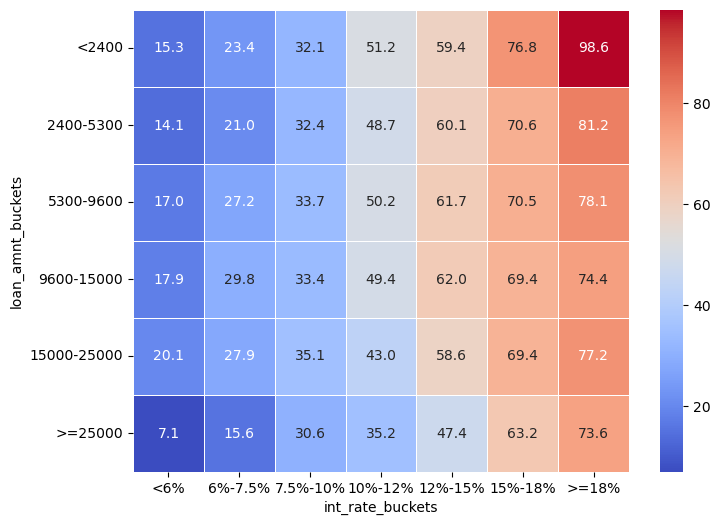

In [64]:
ct=pd.crosstab( df['loan_amnt_buckets'], df['int_rate_buckets'] ,values=df['revol_util']*100, aggfunc='median').round(1)
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, cmap='coolwarm', fmt=".1f", linewidths=.5)
plt.show()

#### As revol_util increases, higher interest rates are charged

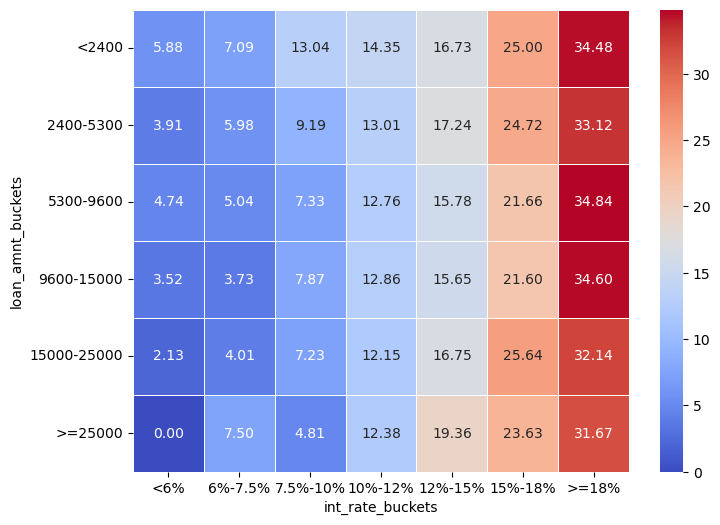

In [65]:
ct=pd.crosstab( df['loan_amnt_buckets'], df['int_rate_buckets'] ,values=df['is_charged_off']*100, aggfunc='mean').round(2)
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

### Higher chage off rate is seen as interest rate increases. 

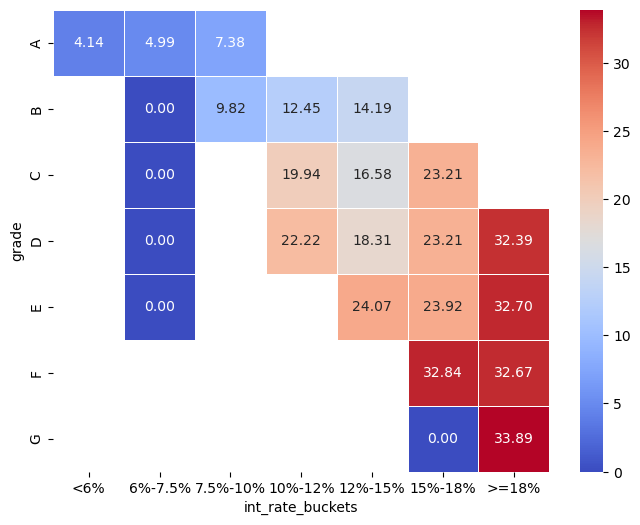

In [66]:
ct=pd.crosstab( df['grade'], df['int_rate_buckets'] ,values=df['is_charged_off']*100, aggfunc='mean').round(2)
plt.figure(figsize=(8, 6))
sns.heatmap(ct, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.show()

- __Grade of the loan corresponds to the interest rates.__
- __Higher charge off rates are observed as the grades declines and int_rates increase__

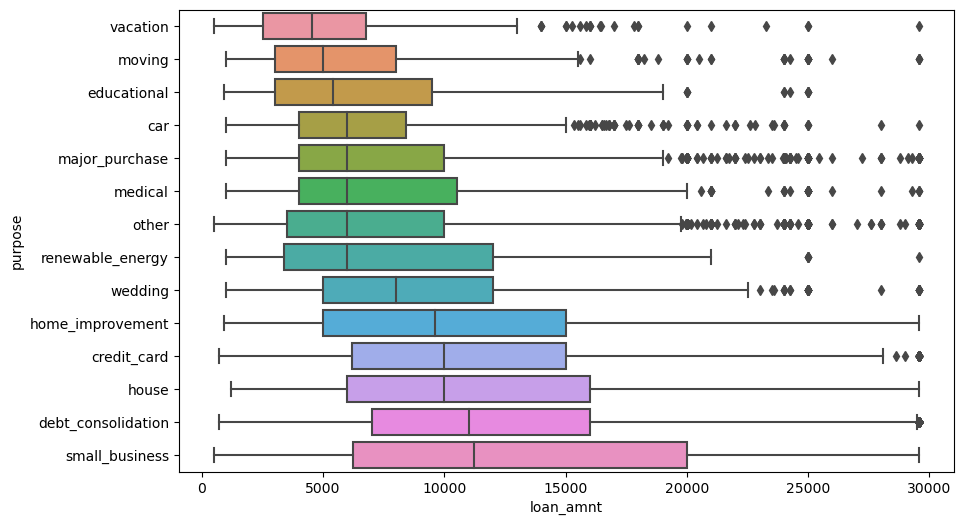

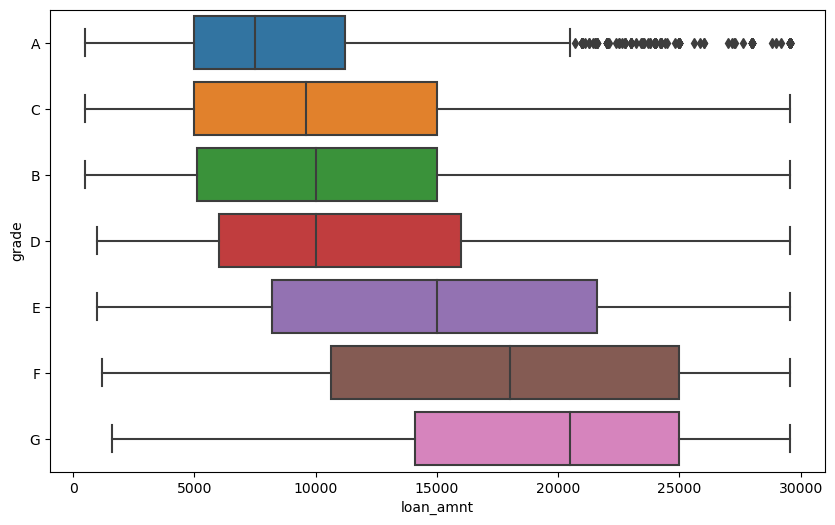

In [67]:
for i in ['purpose','grade']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df['loan_amnt'],y=df[i],order=df.groupby(i)['loan_amnt'].median().sort_values().index.to_list())
    plt.show()


- __purpose: Small_Business and Debt_Consolidation seem to have the higest median loan disbursed__
- __grade: Both interest rate and median loan_amnt tend to increase as grade deteroriates from A to G.__